# Exploratory Data Analysis
![EDA_open](../images/eda_open.jpg)

# Program so far 
***
* Python Data Science Tool box
* Introduction to machine learning
* Summarizing the Data
* Art of Statistical Inference
* Linear Regression

# What are we going to learn today?
***
- Initial Exploration
- Introduction to Seaborn
- Univariate Analysis
- Multi-variate Analysis
- Scaling, Centering, Skewness 
- Basic data cleaning and Preprocessing
- Feature extraction and Feature engineering

Until now all the data that we have seen so far has been clean or pre-cleaned. In real-life we rarely get such clean datasets.

## John's Concerns
***
After dealing with outliers, John realised the significance of a clean data set. So he decided to learn more about data cleaning and data manipulation.

He used the data he had collected so far.

Let's see how John proceeds!

In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats
#For some Statistics
from scipy.stats import norm, skew
from sklearn.impute import SimpleImputer

In [196]:
# Let's import the set
df = pd.read_csv('../data/train.csv',index_col=0)

It’s always a good idea to take a closer look at the data itself. 

With the help of the `head()` and `tail()` functions of the Pandas library, he easily checked out the first few and last few lines of the DataFrame, respectively.

In [197]:
# Code starts here
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [198]:
# Code starts here
df.tail(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


It is also a good practice to know the columns and their corresponsding data types, along with finding whether they contain null value or not. 

In [199]:
# Code starts here
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

The `describe()` function helped him to get various summary statistics that exclude NaN values.

This function returns the **count, mean, standard deviation, minimum and maximum** values and the quantiles of the data.

In [200]:
# Code starts here
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


He also found out the total number of rows and columns in the dataset using the Syntax below:-

In [201]:
# Code starts here
df.shape

(1460, 80)

## How to find the Numerical Features of our Dataset?
***
Now, let's see how John found out and listed the number of Numerical Features in our dataset.

In [202]:
# Code starts here
numerical_feature_columns = list(df._get_numeric_data().columns)
numerical_feature_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

## How to find the Categorical Features in our Dataset?
***
As in the case of Numerical Features, let's find out the number of Categorical Features in our dataset.

In [203]:
# Code starts here
categorical_feature_columns = list(set(df.columns) - set(df._get_numeric_data().columns))
categorical_feature_columns

['BsmtFinType1',
 'ExterQual',
 'MSZoning',
 'RoofMatl',
 'Condition1',
 'HouseStyle',
 'KitchenQual',
 'SaleType',
 'Alley',
 'Fence',
 'GarageQual',
 'LandContour',
 'RoofStyle',
 'MasVnrType',
 'Functional',
 'BsmtFinType2',
 'LotShape',
 'SaleCondition',
 'CentralAir',
 'GarageCond',
 'BsmtExposure',
 'LandSlope',
 'Heating',
 'BsmtCond',
 'Condition2',
 'ExterCond',
 'Exterior1st',
 'MiscFeature',
 'Neighborhood',
 'GarageFinish',
 'Foundation',
 'Utilities',
 'Street',
 'LotConfig',
 'PoolQC',
 'BsmtQual',
 'Exterior2nd',
 'GarageType',
 'Electrical',
 'PavedDrive',
 'FireplaceQu',
 'HeatingQC',
 'BldgType']

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 
# John's Introduction to Seaborn
***
John got a good a glimpse of his data. But that's the thing with Data Science the more you get involved the harder is it for you to stop exploring.

Now, John wanted to **analyze** his data in order to extract some insights. And after a lot of consultation and google search, John learned about Seaborn.

John used Seaborn to do both **Univariate and Multivariate analysis**. How? we will see soon.

## So what is Seaborn? (1/2)
***
Seaborn is a Python visualization library based on matplotlib. 

It provides a high-level interface for drawing attractive statistical graphics.

Some of the features that seaborn offers are : 

* Several built-in themes for styling matplotlib graphics
* Tools for choosing color palettes to make beautiful plots that reveal patterns in your data
* Functions for visualizing univariate and bivariate distributions or for comparing them between subsets of data

## So what is Seaborn? (2/2)
***
* Tools that fit and visualize linear regression models for different kinds of independent and dependent variables
* Functions that visualize matrices of data and use clustering algorithms to discover structure in those matrices
* A function to plot statistical timeseries data with flexible estimation and representation of uncertainty around the estimate
* High-level abstractions for structuring grids of plots that let you easily build complex visualizations


<div class="alert alert-block alert-success">**You can import Seaborn as below :**</div>

In [204]:
import seaborn as sns

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 
## What is Univariate Analysis and how did John use it?
***
** What is Univariate Analysis?**

* Univariate analysis is the simplest form of analyzing data.

* “Uni” means “one”, so in other words your data has only one variable. 

* It doesn’t deal with causes or relationships (unlike regression) and it’s major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.

Univariate Analysis can be done either on **Numerical or Categorical** features.

##  Numerical Features in Univariate Variables

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 
### Histogram
***
When dealing with a set of data, often the first thing we want to do is get a sense for how the variables are distributed. 

John started by identifying a few variables of interest and checking their distribution. 

A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

The bin can be of any size.

Let's plot a histogram : 

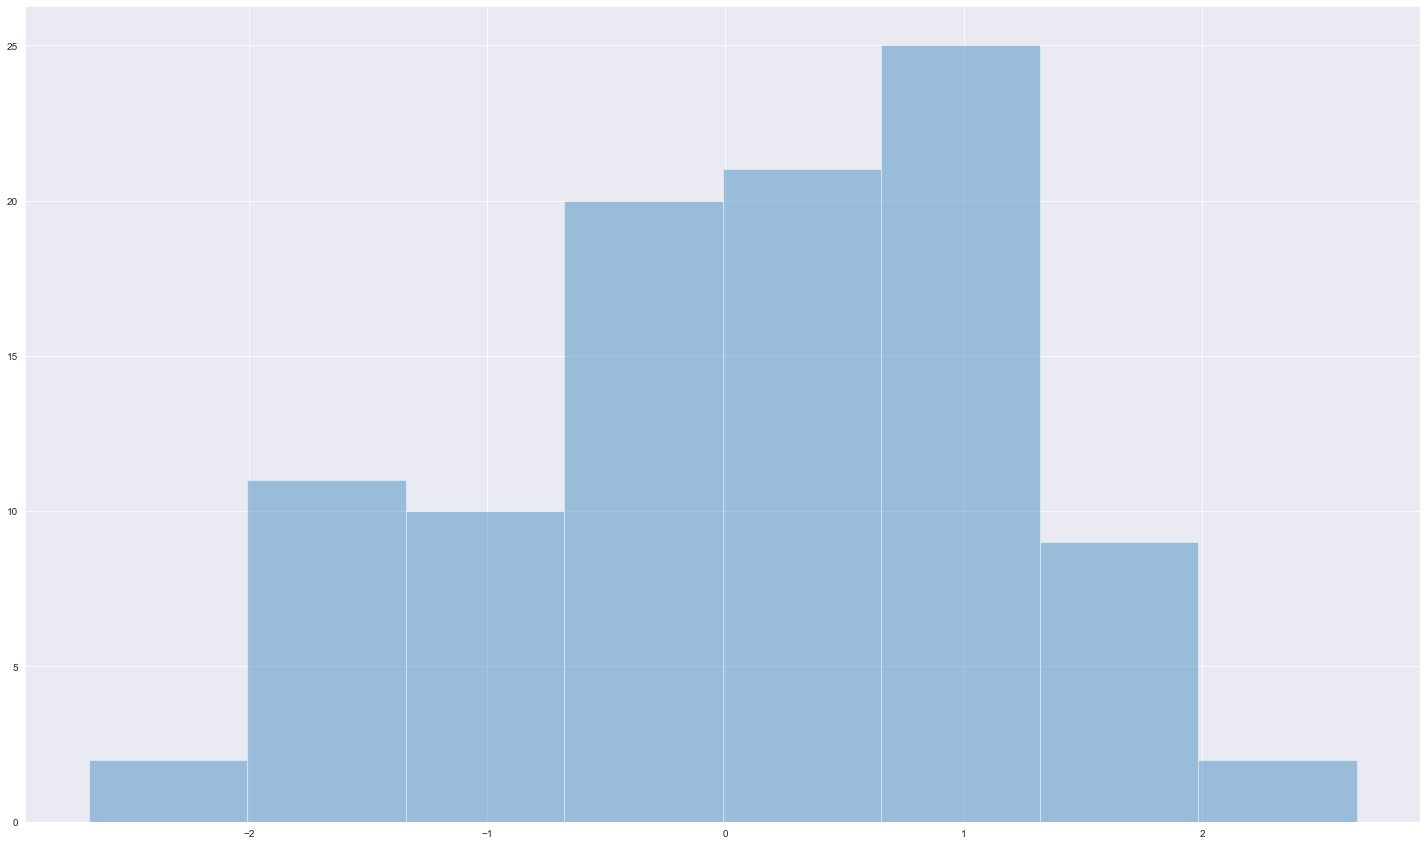

In [205]:
x = np.random.normal(size=100)
sns.distplot(x, kde=False);

In order to make any prediction John needed to fit a linear regression model, so he made sure the distribution of the variables is almost linear. 

Now to check the linearity of the variables he checked for any skewness in the distribution and the outliers in the data.

The variables he checked for were 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'Neighborhood' and the target variable 'SalePrice'.

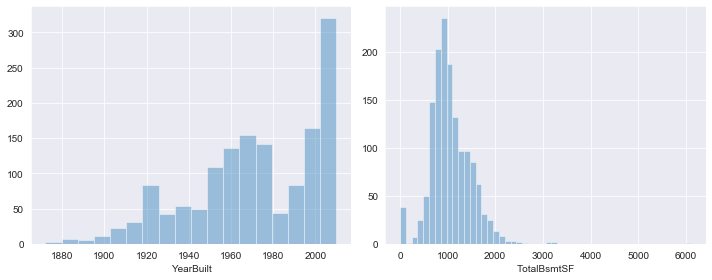

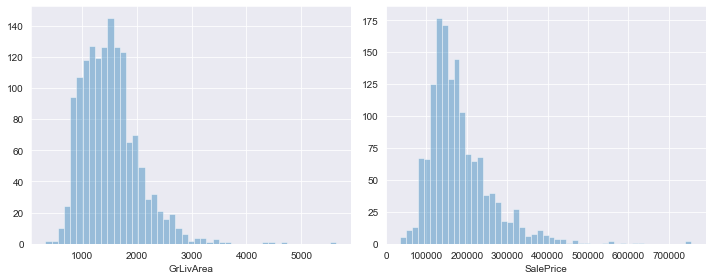

In [206]:
# Histograms
num_cols = ['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(df[num_cols[i]], kde=False)
        plt.subplot(122)            
        sns.distplot(df[num_cols[i+1]], kde=False)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(df[num_cols[i]], kde=False)

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 
### The Kernel Density Estimation
***
The kernel density estimate may be less familiar, but it can be a useful tool for plotting the shape of a distribution.

Like the histogram, the KDE plots encodes the density of observations on one axis with height along the other axis:

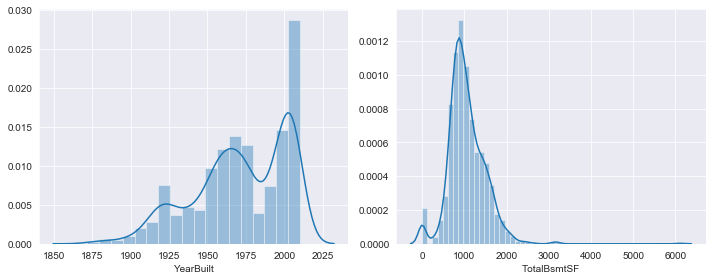

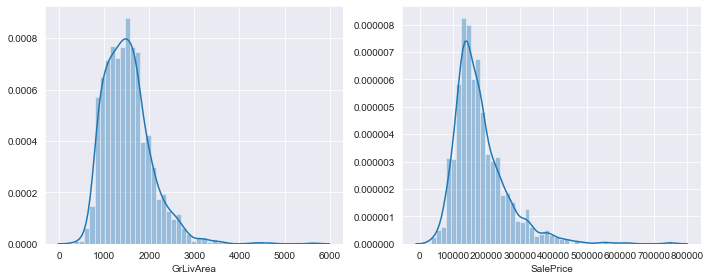

In [207]:
# Histograms

num_cols = ['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(df[num_cols[i]], hist=True, kde=True)
        plt.subplot(122)            
        sns.distplot(df[num_cols[i+1]], hist=True, kde=True)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(df[num_cols[i]], hist=True, kde=True)

John observed that all of the histograms are left or right skewed, hence a transformation is required to make them linear.


<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 
### Boxplots
***
A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. 

The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.

Using this John could find the features which could be removed.

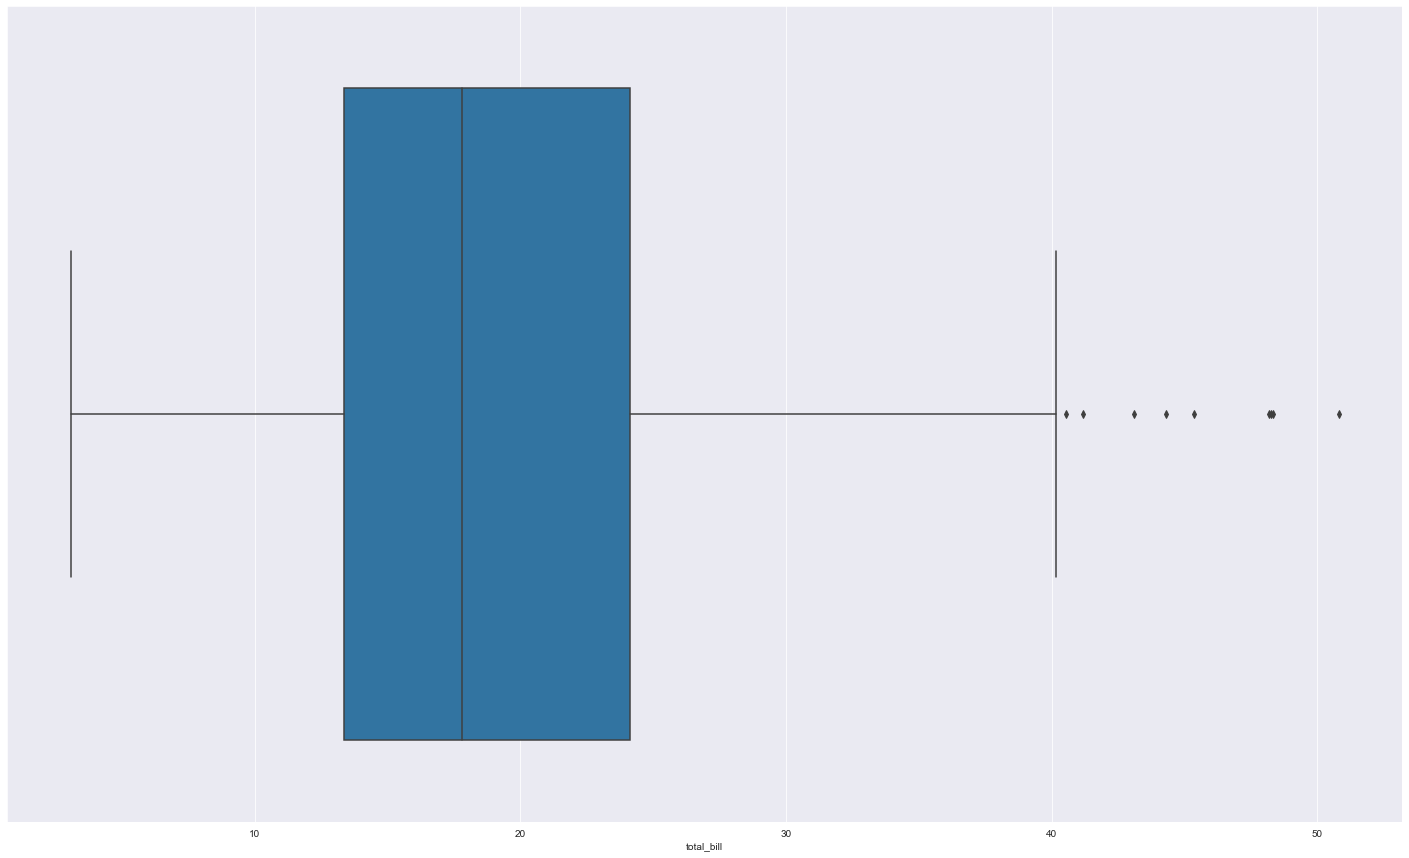

In [208]:
import seaborn as sns
sns.set_style("darkgrid")
tips = sns.load_dataset("tips")
sns.boxplot(x=tips["total_bill"])

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 
### More About Boxplots (1/2)
***
The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five number summary: 
* Minimum
* First quartile
* Median
* Third quartile
* Maximum. 

In the simplest box plot the central rectangle spans the first quartile to the third quartile (the interquartile range or IQR). 

A segment inside the rectangle shows the median and "whiskers" above and below the box show the locations of the minimum and maximum.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 
### More About Boxplots (2/2)
***

![](./images/boxplot.png)

**Outliers** are either 3×IQR or more above the third quartile or 3×IQR or more below the first quartile.

**Suspected outliers** are are slightly more central versions of outliers: either 1.5×IQR or more above the third quartile or 1.5×IQR or more below the first quartile.

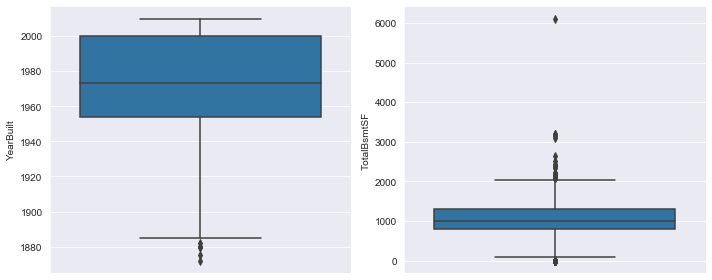

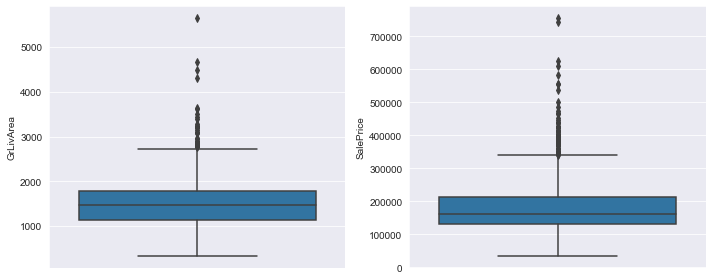

In [209]:
# BoxPlots

num_cols = ['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']
facet = None
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(facet, num_cols[i],data = df)
        plt.subplot(122)            
        sns.boxplot(facet, num_cols[i+1],data = df)
        plt.tight_layout()
        plt.show()

    else:
        sns.boxplot(facet, num_cols[i],data = df)

## Categorical Features in Univariate Variables

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 
### Countplots
***
Most of the buildings are built post 1960 and most houses have an area in the range 1-2k sq feet. There are quite a few outliers in the sale price and living area and these might be correlated. John wanted to check the distribution of the categorical columns.

He used Countplots for this which does nothing but shows the counts of observations in each categorical bin using bars.

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. 

He chose the following columns from the above categorical_features_columns :
* Neighborhood
* SaleCondition
* BldgType

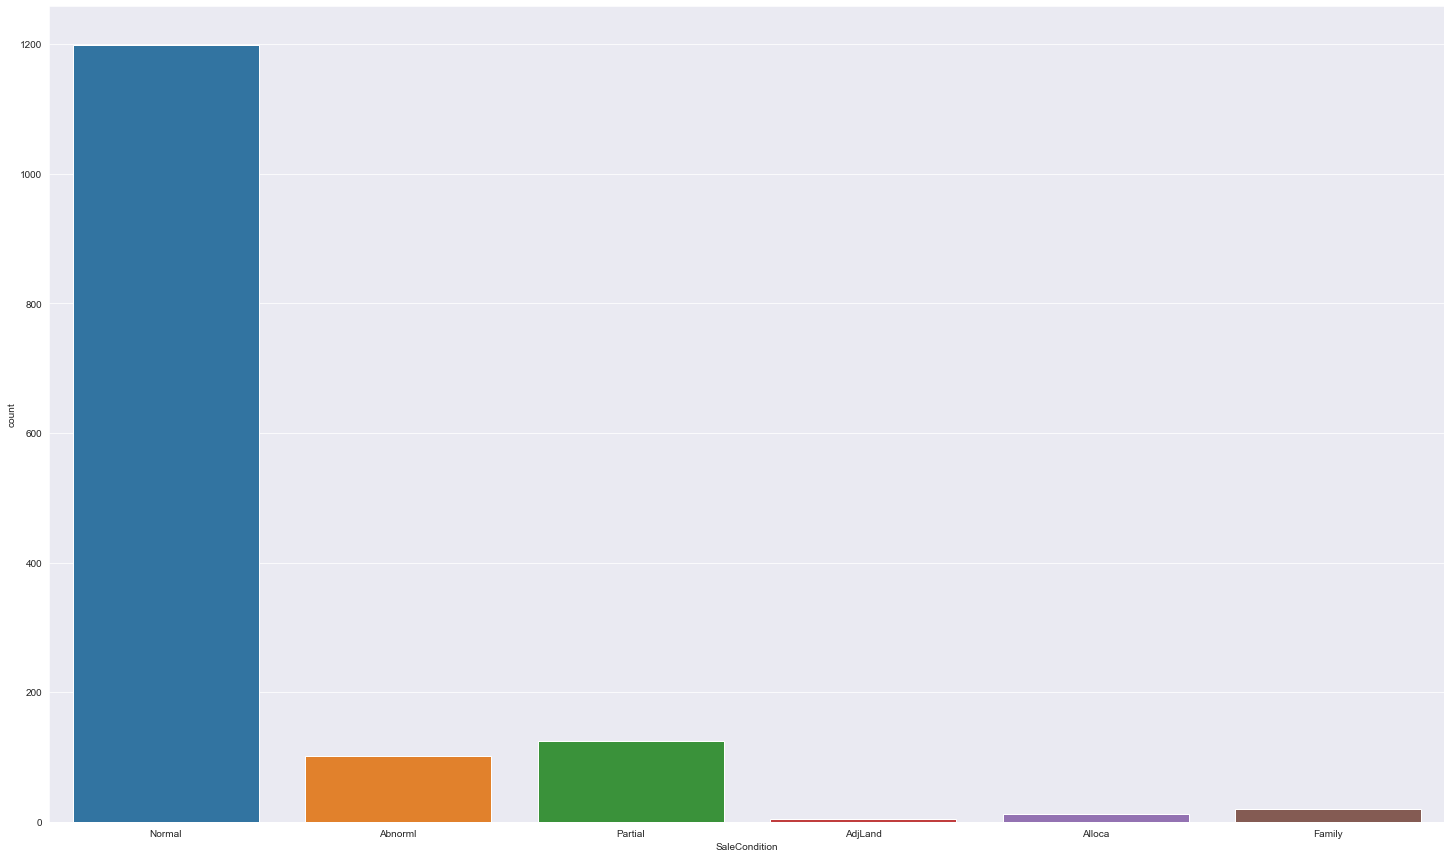

In [210]:
sns.countplot('SaleCondition', data=df)

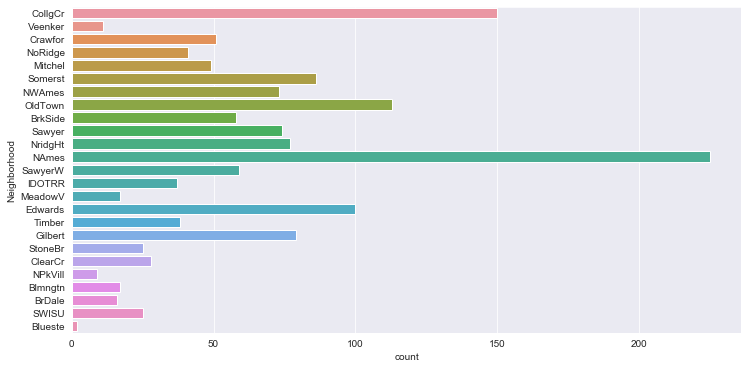

In [211]:
plt.figure(figsize=(12,6))
sns.countplot(y='Neighborhood', data=df)

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 
## What is Multivariate Analysis?
***
John starts to wonder, what if two or more variables are related? This would surely help derive further insight on the houses! 

In Multivariate analysis John tries to find the relations between multiple variables. Obviously, in real life problems variables can be any combination of numeric or categorical variables.
The combinations are:
* Numeric vs Numeric
* Numeric vs Categorical
* Categorical vs Categorical

Another aspect of variable combination we look at is:
* Feature vs Feature
* Feature vs Target

## Numeric vs Numeric

For these kind of plots John uses a scatterplot of the two variables. Although one can use a variety of plots in seaborn to do a quick and dirty EDA to some sophisticated plots. lmplot is one of the plots to do a scatterplot in seaborn, it'll by default fit a regression line on top which you can control using 'fit_reg' argument.
 
In these plot you will also see him plotting some important feature against our target.

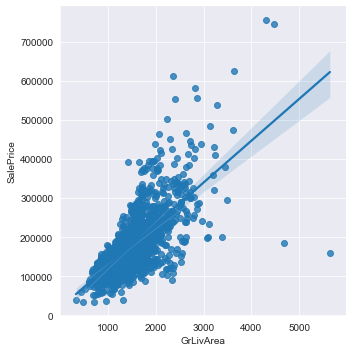

In [212]:
sns.lmplot('GrLivArea', 'SalePrice', data=df, fit_reg=True)

* Using a scatterplot John can also detect *Multivariate outliers*, in this case there are two houses which have an area above ~4500 and they don't follow the trend. Removing these would give a better fit.

Another plot that John could use is a jointplot which gives a plethora of information in a single plot. It has:
* Scatter Plot
* Regression line fit to the data.
* Histogram and kde of individual variables.
* Pearson correlation and p value.

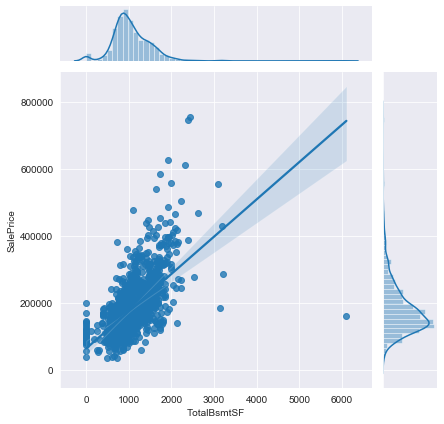

In [213]:
sns.jointplot('TotalBsmtSF', 'SalePrice', data=df, kind='reg')

<div class="alert alert-block alert-success">**Another plot one can use is a hexplot which plots two numeric variables. Darker colors signify more points.**</div>

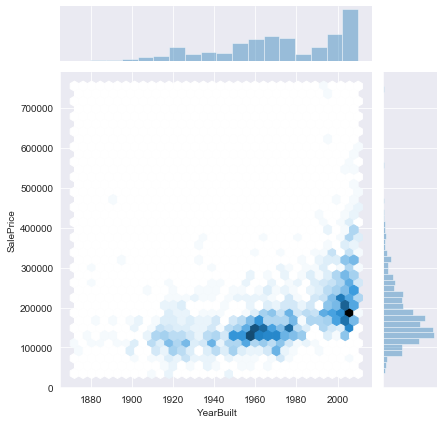

In [214]:
sns.jointplot('YearBuilt', 'SalePrice', data=df, kind='hex')

Since John is going to use linear regression for modelling, its necessary to remove correlated variables to improve our model. He must find correlations using pandas 'corr' function and can visualize the correlation matrix using a heatmap in seaborn.

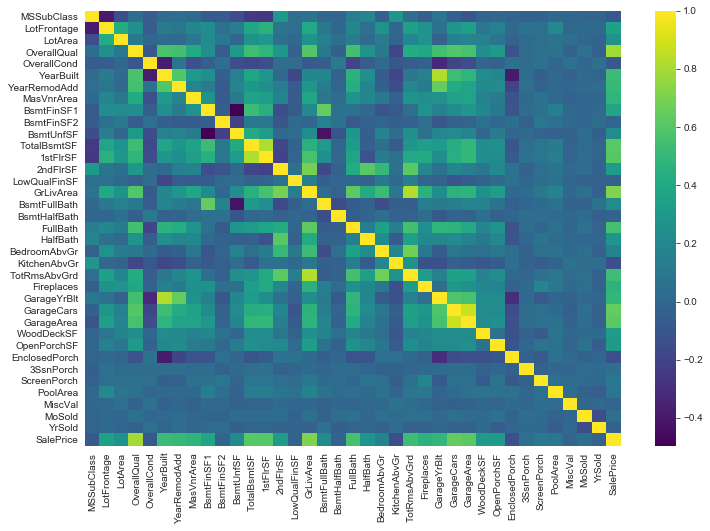

In [215]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='viridis')

John saw the following inferences from above -
- A lot of variables are correlated to SalePrice which is good. 
- GrLivArea is highly correlated with TotRmsAbvGrd.
- Also Year the garage was built(GarageYrBlt) is correlated with the year the building was built(YearBuilt). 

**It's a good idea to remove such correlated variables during feature selection.**

<div class="alert alert-block alert-success">**Now John plots some top variables to see the relations between them. He starts by filtering top 10 variables which are highly correlated with SalePrice.**</div>

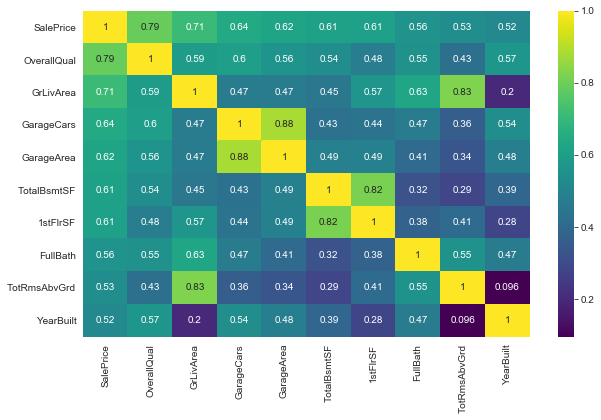

In [216]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = df.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

- 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.
- 'GarageCars' and 'GarageArea' are also correlated variables. However no of cars that can fit into a garage is dependent on the garage area and one can remove one of these. Check the correlation between them
- TotalBsmtSF and 1stFlrSF are also highy correlated. We can drop one of these.
- As pointed out above Yearbuilt and TotRmsAbvGrd are highly correlated, we'll discard TotRmsAbvGrd.

<div class="alert alert-block alert-success">**An easy way to plot all possible interactions is between a set of numeric variables is using pairplot function in seaborn.**</div>

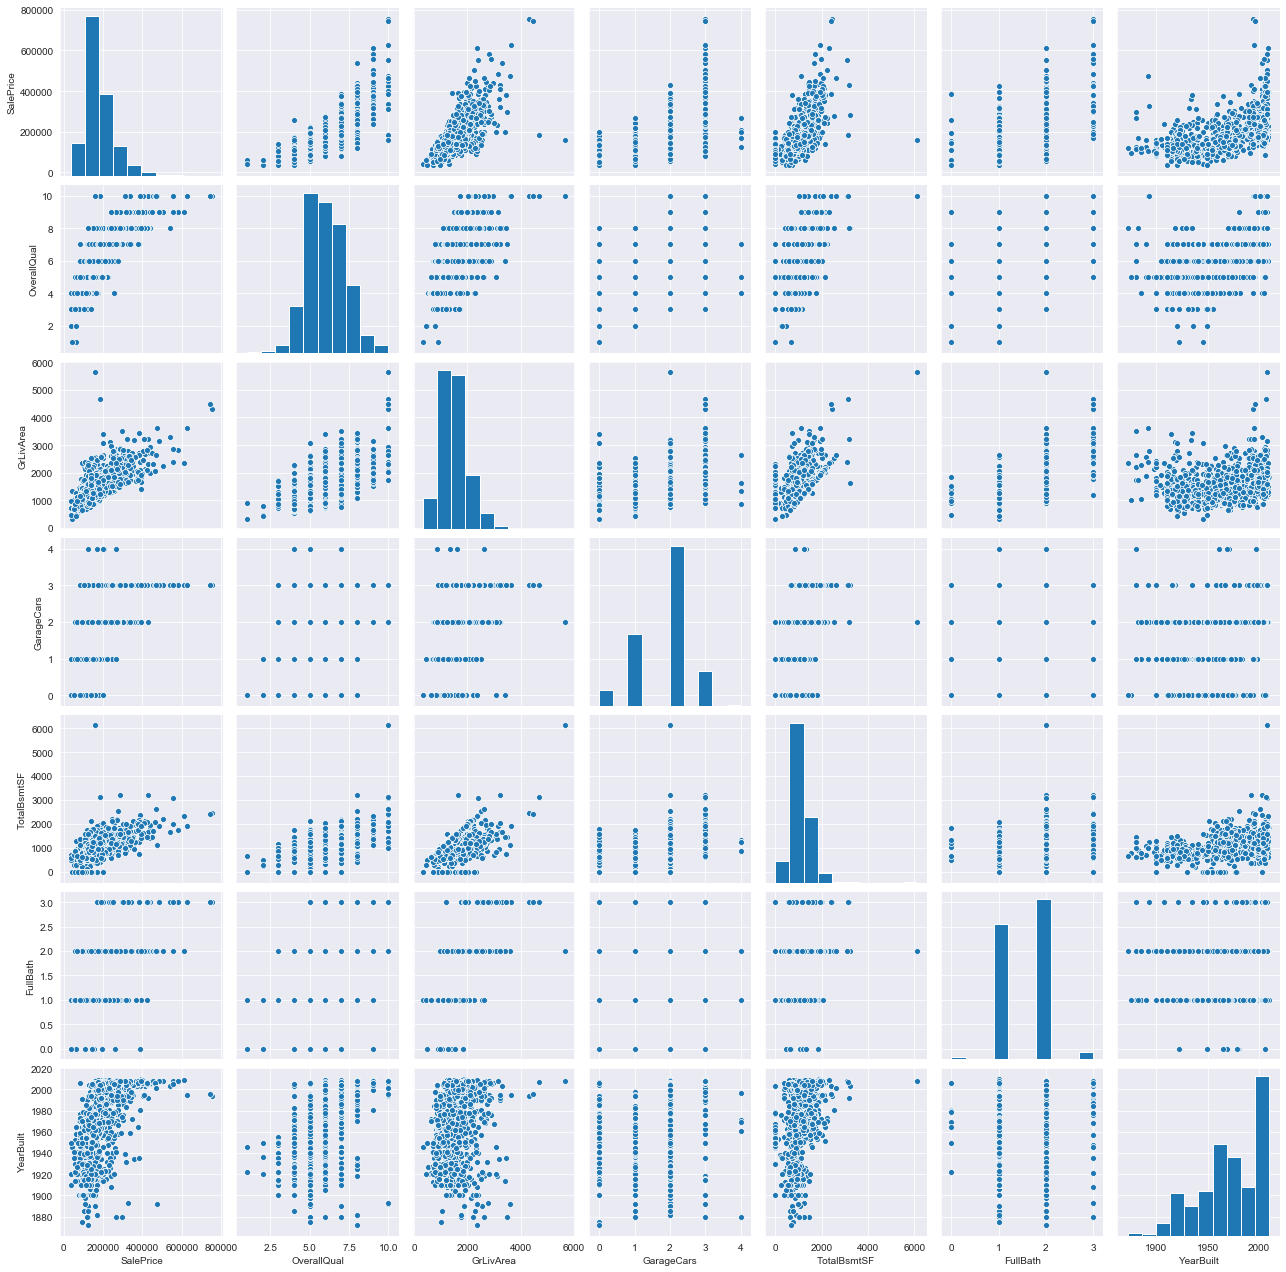

In [217]:
# Visualizing relations between all major variables
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols])

John notices a few interesting things here, in the scatter plot of TotalBsmtSF and GrLivArea, there is a line below which most TotalBsmtSF values fall in which makes sense as the area of Basement usually is lesser than living area. Also there is an exponential increase in SalePrice vs Yearbuilt in the recent past.

## Numeric vs Categorical

To plot these relations we can use boxplots and swarmplots. John created these using boxplot function in seaborn. John is creating a boxplot for numerical variables grouped by categories in categorical variable.

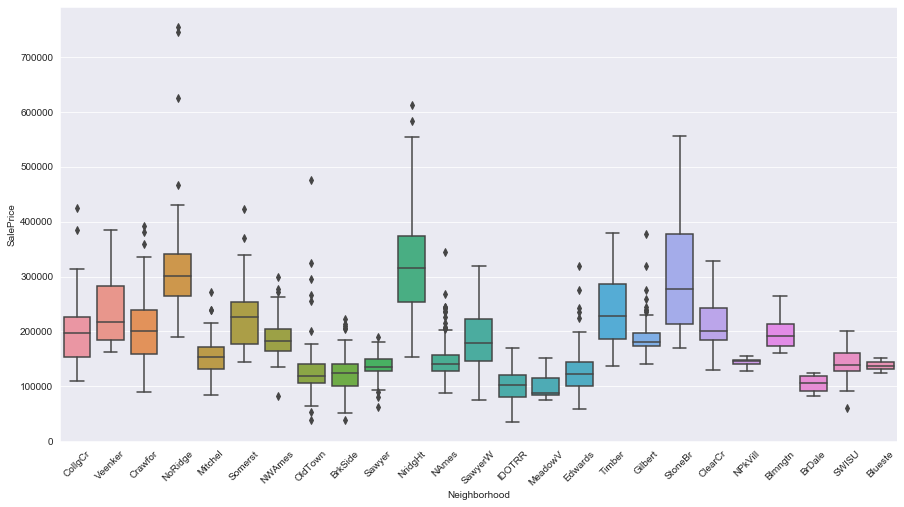

In [218]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot('Neighborhood', 'SalePrice', data=df)

* John concluded that the distribution of SalePrice changes with the individual neighborhoods and can be a good predictor for it.
* Next he takes a look at swarmplots which are similar to boxplots, but they also show no of points at each value of numerical variable. A denser plot signifies more observations in it.

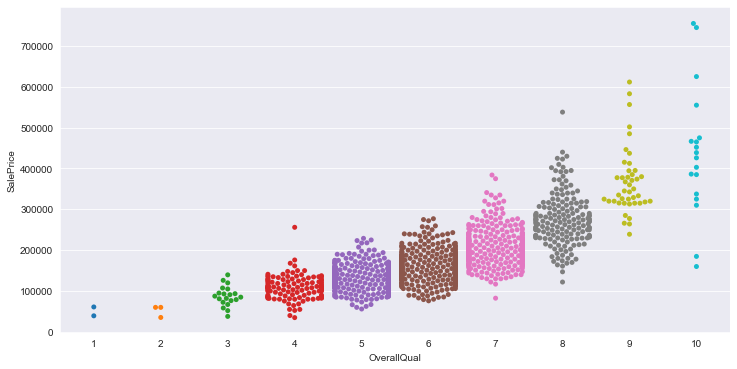

In [219]:
plt.figure(figsize=(12,6))
sns.swarmplot('OverallQual', 'SalePrice', data=df)

<div class="alert alert-block alert-success">Here John can see that there's a marked increase in saleprice as the overall quality increases. So using this variable is a good idea to predict SalePrice.</div>

## Categorical vs Categorical

This can be done using using crosstab or graphically using a stacked barplot. John here considers two variables 'Neighborhood' and 'OverallQual' and checks the relation between them using both of these.

In [220]:
crosstab = pd.crosstab(index=df["Neighborhood"], columns=df["OverallQual"])
crosstab

OverallQual,1,2,3,4,5,6,7,8,9,10
Neighborhood,,,,,,,,,,
Blmngtn,0,0,0,0,0,0,14,3,0,0
Blueste,0,0,0,0,0,2,0,0,0,0
BrDale,0,0,0,0,5,11,0,0,0,0
BrkSide,1,1,3,10,21,18,4,0,0,0
ClearCr,0,0,0,3,6,10,9,0,0,0
CollgCr,0,0,0,1,28,24,71,23,3,0
Crawfor,0,0,0,1,11,19,13,7,0,0
Edwards,1,0,5,25,38,23,5,0,1,2
Gilbert,0,0,0,1,3,33,36,5,1,0


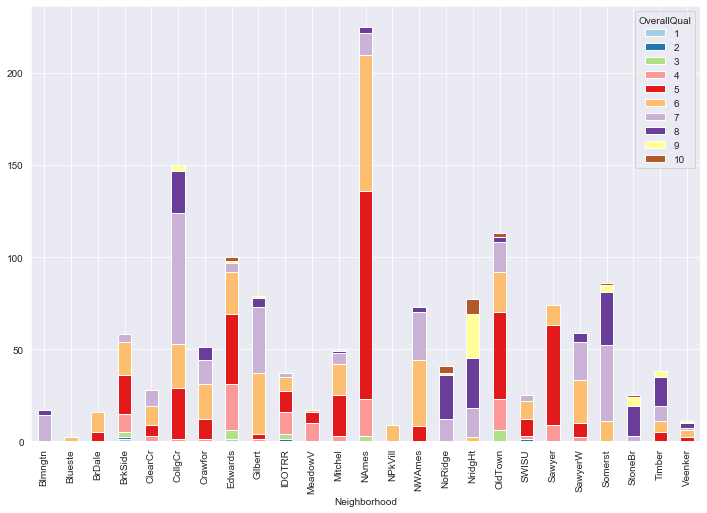

In [221]:
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

John considered some of the initial entries and realised the data :-
- Had missing values
- Had outliers
- Was sub-optimally represented 

## Treatment of Data
***
John had already applied linear regression on the house pricing dataset.And it didn't seem to be very helpful.

He knows that he cannot apply a ML model on this raw data currently.

Stuck with this, he consults his friend Jane for help. Jane suggested him to treat the data and creating new relevant features using the following techniques:
- Data Cleaning and Pre-processing
- Feature Extraction
- Feature Engineering

Let’s see how these techniques helped John:

## Data Cleaning and Pre-processing
***
Data cleaning and preprocessing involves following techniques
- Handling outliers
- Handling missing values
- Handling skewness


### Handling Outilers
***

**Why Outlier Treatment?**
***
Jane asked John to starts plotting few graphs of numerical features in order to study their behaviour

Let's see how John plots *GrLivArea vs SalePrice*.  

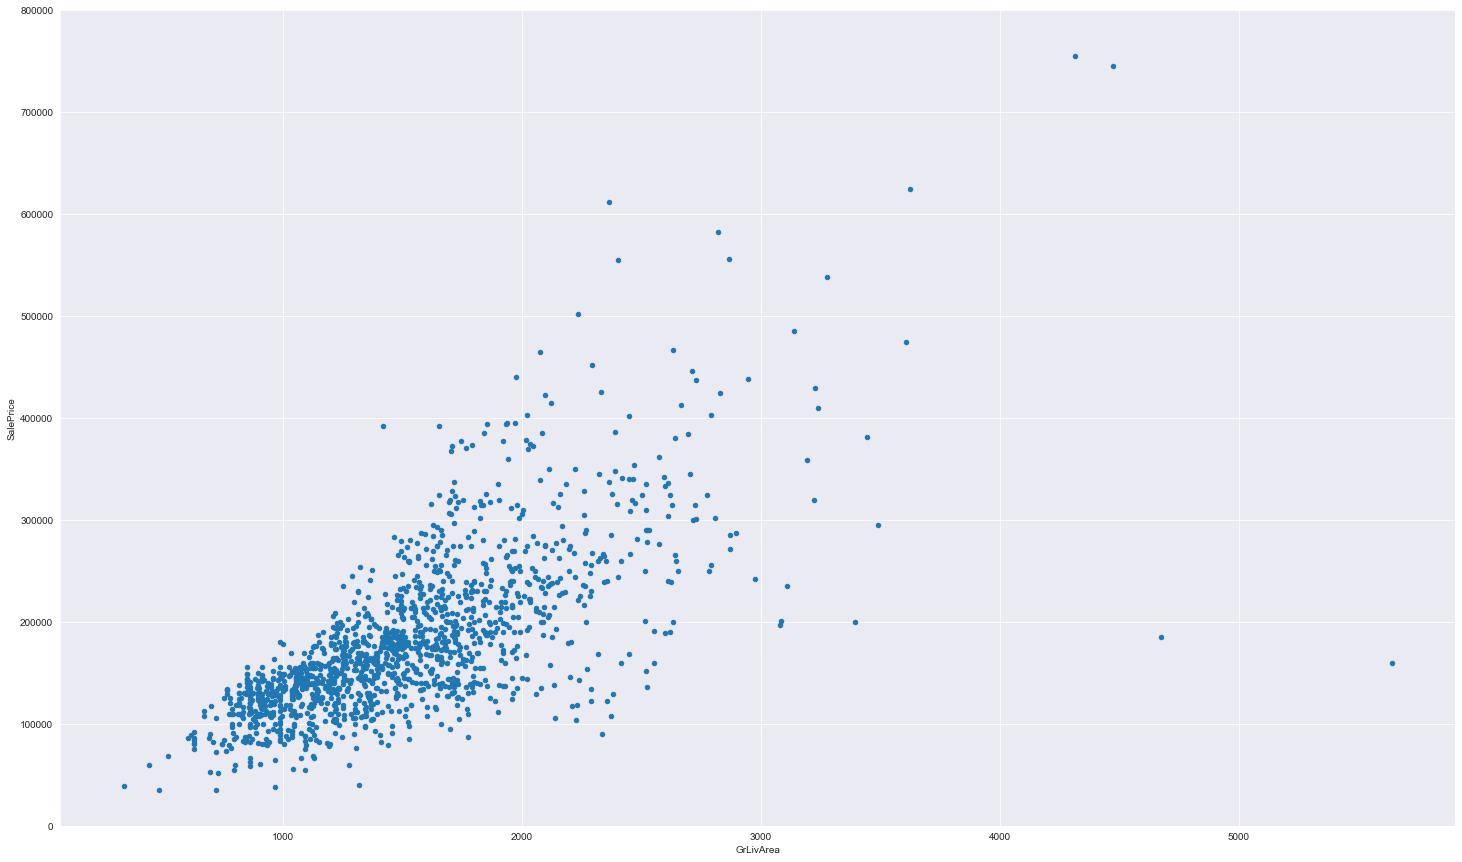

In [222]:
#Scatter plot GrLivArea vs SalePrice

# Code starts here
data = pd.concat([df['SalePrice'], df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

## So what did John observe?
***
* The _SalePrice_ and _GrLivArea_ are in a linear relationship.

* At the bottom right there are two points with extremely large GrLivArea that are of a low price. These values are huge oultliers.

He decides, to plot a few more graphs.

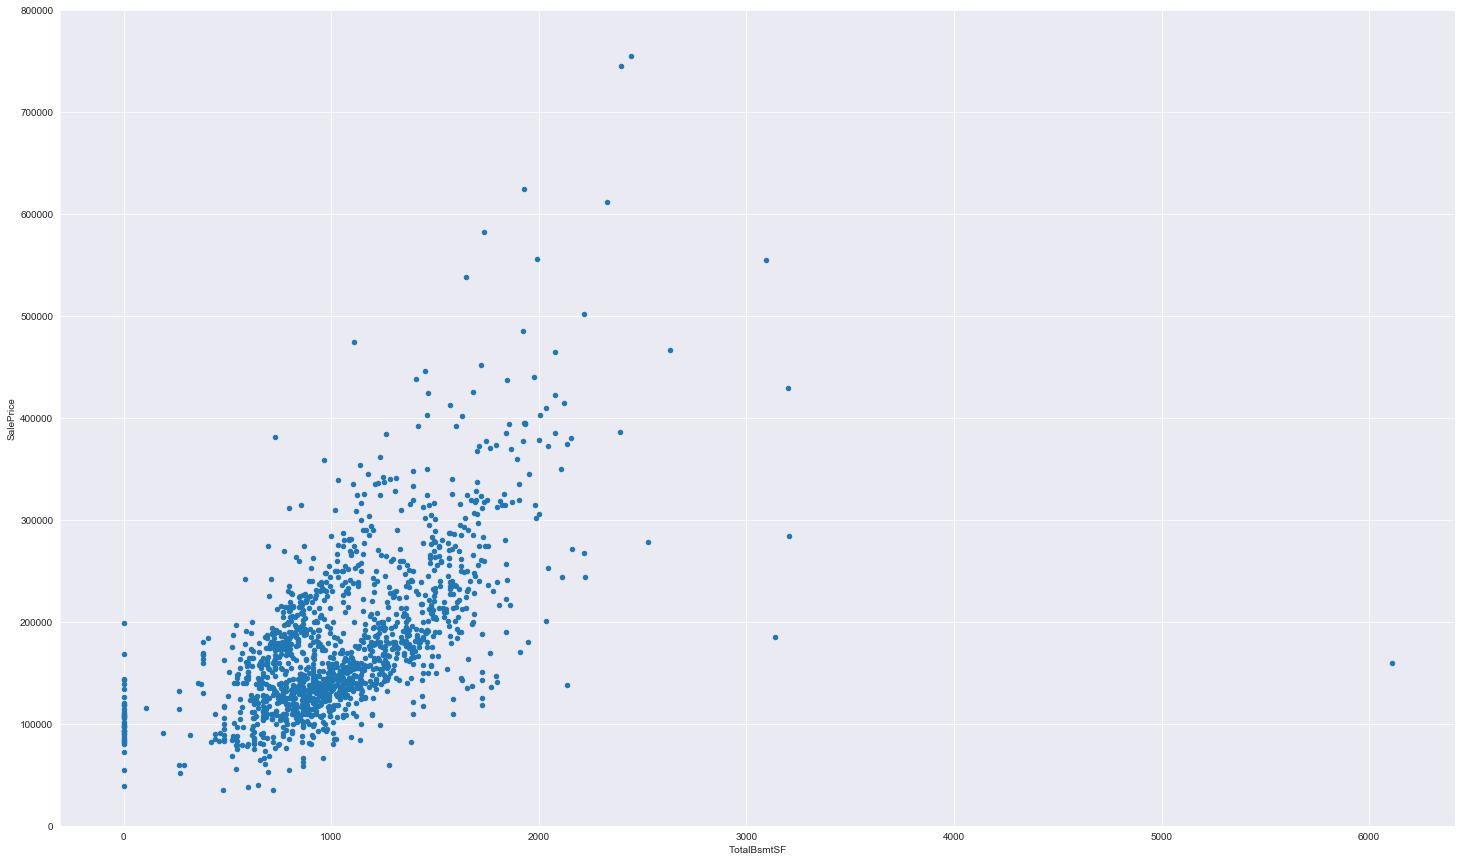

In [223]:
#Scatter plot TotalBsmtSF vs SalePrice

# Code starts here
data = pd.concat([df['SalePrice'], df['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0, 800000));


It seems that **'TotalBsmtSF'** is also linearly dependent on **'SalePrice'**.

At the bottom right of the plot John can noticed that, there is one outlier which has a high Basement area at relatively quite cheap Sale Price.

There are quite a few outliers in the data. John considered this to be one of the reasons the Linear Regression model performed poorly.

John was through with analyzing the numerical features in the data.

Intuitively, John started thinking about the change in behaviour for the categorical features.

He decided to go with his intuition and began analysing the categorical features.

Wondering how to start, Jane suggested to use boxplots.

John plotted a boxplot for the OverallQual and SalePrice to analyze them.



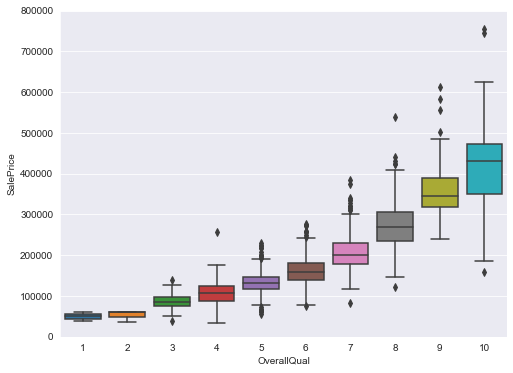

In [224]:
# Box plot of OverallQual vs SalePrice

# Code starts here
data = pd.concat([df['SalePrice'], df['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);



- Treating outliers is important because
Outliers can skew and mislead the training process of machine learning algorithms resulting in longer training times, less accurate models and ultimately poorer results.
Many machine learning algorithms are sensitive to the range and distribution of attribute values in the input data.

- Surely John knows this, let's see how he removes them

## John's Approach 1: Univariate Methods
***
John selects a threshold value for the Numerical features and removes all the rows beyond that threshold value.

In short :
- Visualize the data using scatterplots, histograms and box and whisker plots and look for extreme values.
- Assume a distribution (Gaussian) and look for values 1.5 times from the first or third quartile
- Filter out outliers candidate from training dataset and assess the model’s performance.

Let's see how John treat the ouliers:-

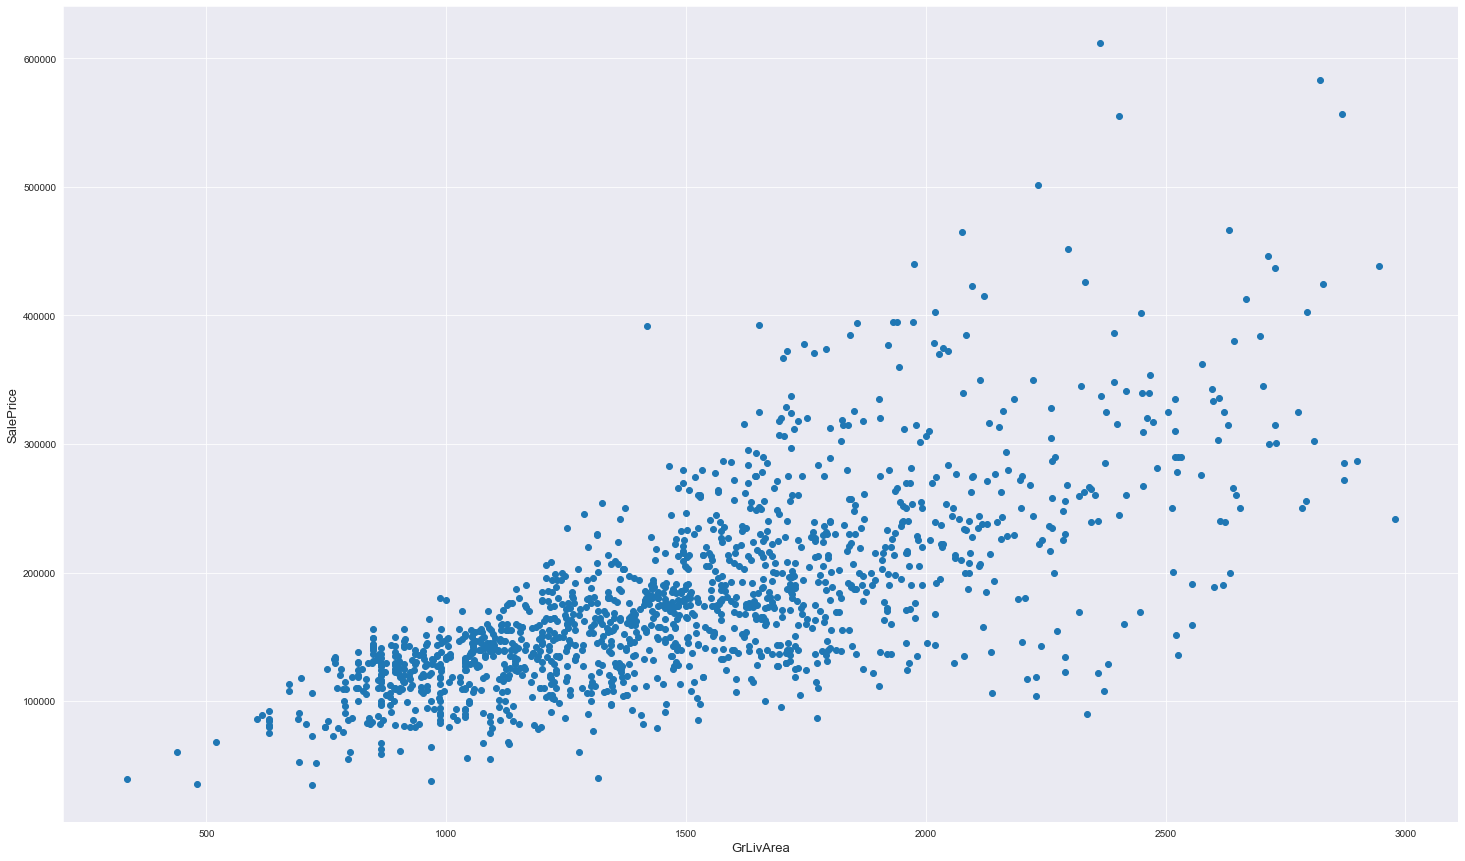

In [225]:
#Deleting outliers
df = df.drop(df[(df['GrLivArea']>3000) & (df['GrLivArea']<6000)].index)

#Check the graph again
fig, ax = plt.subplots()
ax.scatter(df['GrLivArea'], df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## What changed?
***
Let's draw the original plot and the plot after removing the outliers.

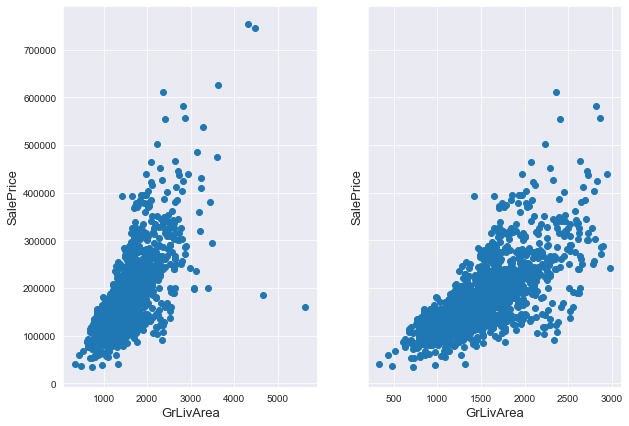

In [226]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(10, 7))

data = pd.read_csv('../data/train.csv',index_col=0)

# Code starts here 

# Scatter plot for data
ax1.scatter(data['GrLivArea'], data['SalePrice']);
ax1.set_ylabel('SalePrice', fontsize=13)
ax1.set_xlabel('GrLivArea', fontsize=13)

# Scatter plot for df
ax2.scatter(df['GrLivArea'], df['SalePrice'])
ax2.set_ylabel('SalePrice', fontsize=13)
ax2.set_xlabel('GrLivArea', fontsize=13)

plt.show()

John had a requirement of a house with living area round 3000sq. The houses with greater Ground Living Area were outliers for him.

As, we can easily note from the above plots, that the outliers have been removed.

John had heard of few other approaches, that he could have tried to remove the outliers. They are : 

#### Approach 2: Multivariate Methods

- Use clustering methods to identify the natural clusters in the data, identify the points which far away from the cluster centroids
- Use dimensionality reduction techniques

**Note: ** We will study about these techniques in _Unsupervised Learning_.

#### Approach 3: Algorithmic Methods

- Ensemble methods like random forests and gradient boosting provide relatively robust results with data with outliers.

**Note:** We will study about these techniques in _Unsupervised Learning_.

## Handling Missing Values
***

John was happy that the outliers had been removed. 

He was casually skimming through the data when he realised that a lot of the data had missing values.

Intuitively, he decided to check out few entries in the data, which had most values as null.

For each house entry, he observed the number of features which were missing and arrange them in an ascending order.


In [227]:
# missing data
total = df.isnull().sum(axis=1).sort_values(ascending=False)
percent = (df.isnull().sum(axis=1)/df.isnull().count(axis=1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total_missing_values_per_row', 'Percent'])
missing_data.head(20)

,Total_missing_values_per_row,Percent
Id,,
534,15,0.1875
1219,15,0.1875
1012,15,0.1875
40,15,0.1875
521,14,0.1750
1180,14,0.1750
706,14,0.1750
343,11,0.1375
1031,11,0.1375


The house entry number 40 had values of 15 features missing. So, did the houses number 1219, 1012, 534 and so on.
John realised that there were too many of them

Worried, John consulted Jane again on this. Jane explained a few methods to treat missing values.

Data can have missing values. It's very normal to have some missing values.

**Reasons for Missing Values**

- These are values for attributes where a measurement could not be taken or is corrupt for some reason.
- Missing that depends on unobserved predictors

**Why Missing Value Treatment?**
- Missing data in the training data set can reduce the power / fit of a model.
- Missing values can lead to a biased model because we have not analyzed the behavior and relationship with other variables correctly
- This is useful because some algorithms are unable to work with or exploit missing data.

Therefore, it is important to identify and mark this missing data. Once marked, replacement values can be prepared.

In [228]:
missing_data[missing_data.Total_missing_values_per_row == 0]

,Total_missing_values_per_row,Percent
Id,,


## John's Approach 1: Remove records (rows) that contain a missing value
***
John had so many houses with missing features.
He wondered, what would he do?

He found it easy to remove all those rows which contained null values.
Neat and Simple, he thought.

So, let's drop all those houses which had any feature as 0.
If all the features, for a house were available, only then it would be retained. 

In [229]:
df_copy = df.copy().dropna(how='any')
df_copy.shape

(0, 80)

Unfortunately, none of the observations had values for all the features i.e. non-empty rows
John would surely lose out all his data in such this case.

Hence he could not remove houses (rows) that contain missing value as it will lead to loss of significant information because the missing value is spread all over dataset. 

In a nutshell :
- This approach would work fine if the amount of missing values is very small (up to ~2% of entire data)

- But with large amount of scattered missing values, we would lose out on some valuable information.


**Note:**

A slightly better approach would be to drop only those rows, which had all the values as null.
This would surely work better then the previous approach, thought Jon.

Let's check the number of houses, with at least some data. 

In [230]:
df_copy = df.copy().dropna(how='all')
df.shape

(1442, 80)

## Jon's Approach 2: Remove features (columns) that contain missing values.
***
John thought of now exploring the features rather than the individual houses.

For each feature(column) in the data, John counted the number of houses(rows) with null values.

In [231]:
#missing data observing in columns
total = df.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((df.isnull().sum(axis=0)/df.isnull().count(axis=0))*100).sort_values(ascending=False)

In [232]:
# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
PoolQC,1438,99.722607
MiscFeature,1388,96.255201
Alley,1352,93.758669
Fence,1166,80.859917
FireplaceQu,689,47.780860
LotFrontage,257,17.822469
GarageType,79,5.478502
GarageCond,79,5.478502
GarageFinish,79,5.478502
GarageQual,79,5.478502


Jon observed from the above information that features such as **PoolQC, MiscFeature, Alley, Fence** are having most of the values labeled as missing. Hence, they don't seem to be very important and will not have a significant effect.

We can surely drop those columns.
So, let's drop these columns with high missing values & check the remaining columns. 

In [233]:
# droping columns containing high missing values 
df1=df.copy()

# Code starts here
df1.drop(["PoolQC", "MiscFeature","Alley","Fence"], axis = 1, inplace = True)

In [234]:
# display the columns left after droping the above features

# Code starts here
list(df1.columns.values)[:20]

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle']

## Jon's Approach 3: Missing values Imputation
***
None of the above techniques worked for John. He dropped a few columns, however he observed that there still were other features with high number of missing values.

The *FireplaceQu* column has around 700 missing values whereas *LotFrontage* has around 300 missing values.
He was in a dilemma, whether to retain them or drop them.

After a long time, he decided to retain them. But, what should he do with the missing values?

Let's check out a few columns from the data.



In [235]:
print(df[["PoolQC","MiscFeature","GarageYrBlt","GarageArea","GarageCars"]])

     PoolQC MiscFeature  GarageYrBlt  GarageArea  GarageCars
Id                                                          
1       NaN         NaN       2003.0         548           2
2       NaN         NaN       1976.0         460           2
3       NaN         NaN       2001.0         608           2
4       NaN         NaN       1998.0         642           3
5       NaN         NaN       2000.0         836           3
...     ...         ...          ...         ...         ...
1456    NaN         NaN       1999.0         460           2
1457    NaN         NaN       1978.0         500           2
1458    NaN        Shed       1941.0         252           1
1459    NaN         NaN       1950.0         240           1
1460    NaN         NaN       1965.0         276           1

[1442 rows x 5 columns]


What he did was that he imputed the missing values with a representative constant value that has meaning within the domain, such as 0 or None, distinct from all other values.

He imputed them by proceeding sequentially through features with missing values.

- PoolQC : data description says NA means "No Pool". That makes sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

- MiscFeature : data description says NA means "no misc feature"
- GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)

John consider 'NA',  'no misc features' and 'Nan' to be equivalent to null values and need to be imputed.

Let's impute the missing values as per the following :
- Categorical Features : None
- Numerical Features : 0

In [236]:
df2=df.copy()
df2["PoolQC"] = df2["PoolQC"].fillna("None")
df2["MiscFeature"] = df2["MiscFeature"].fillna("None")

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df2[col] = df2[col].fillna(0)
print(df2[["PoolQC","MiscFeature","GarageYrBlt","GarageArea","GarageCars"]])

     PoolQC MiscFeature  GarageYrBlt  GarageArea  GarageCars
Id                                                          
1      None        None       2003.0         548           2
2      None        None       1976.0         460           2
3      None        None       2001.0         608           2
4      None        None       1998.0         642           3
5      None        None       2000.0         836           3
...     ...         ...          ...         ...         ...
1456   None        None       1999.0         460           2
1457   None        None       1978.0         500           2
1458   None        Shed       1941.0         252           1
1459   None        None       1950.0         240           1
1460   None        None       1965.0         276           1

[1442 rows x 5 columns]


## Jon's approach 5: Impute missing values with a mean, median or mode value for the column.
***
Imputing values with a default value, is a good option.
But, we can still perform better, right?

John, thought of imputing the missing values with more relevant data rather than a default value.
Indeed, a great idea!!

John applied this idea on a few features in our data.

_Numerical Feature :_ 
- Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , he filled in missing values by the median LotFrontage of the neighborhood.


_Categorical Feature :_
- However, for categorical feature one cannot calculate **mean** or **median**.
- 'RL' is by far the most common value. So he filled in missing values with 'RL'.

In [237]:
# Imputation Using Imputer
imp_mean = SimpleImputer(missing_values = np.nan, strategy='mean')
imp_mean.fit(df2[['LotFrontage']])
df2['LotFrontage'] = imp_mean.transform(df[['LotFrontage']])
print(df2["LotFrontage"])

Id
1       65.0
2       80.0
3       68.0
4       60.0
5       84.0
        ... 
1456    62.0
1457    85.0
1458    66.0
1459    68.0
1460    75.0
Name: LotFrontage, Length: 1442, dtype: float64


In [238]:
#Mode value imputation
df2['MSZoning'] = df2['MSZoning'].fillna(df2['MSZoning'].mode()[0])
print(df2['MSZoning'])

Id
1       RL
2       RL
3       RL
4       RL
5       RL
        ..
1456    RL
1457    RL
1458    RL
1459    RL
1460    RL
Name: MSZoning, Length: 1442, dtype: object


**Other Methods to Handle Missing Values : **

#### Approach 6: Impute missing values with a value estimated by another predictive model

We will study these techniques while we learn _Unsupervised Learning_

#### Approach 7 : Use algorithms that Support Missing Values

Not all algorithms fail when there is missing data.

There are certain algorithms that work well even with missing values.
For such algorithms, we need not worry about the missing values.

Few such algorithms are : 
- Random Forest
- Classification and Regression Trees
- KNN

# Handling Skewness
***

So far John has really made some good progress.

However, John knows that the Linear Regression has following assumptions:
- Linear relationship
- **Multivariate normality**

**Multivariate normality means that regression requires all its variables to be normal. 
By having skewed data one might violate the assumption of normality.**

So, he is far from applying a Linear Regression yet and needs to check the skewness of the data.
Let's explore a bit more about Skewness.

**What is Skewness?**

- Skewness is a measure of asymmetry of distribution.
- Skewness is a measure of symmetry, or more precisely, the lack of symmetry. 

**Why handle Skewness?**
- Many model building techniques have the assumption that predictor values are distributed normally and have a symmetrical shape. Hence, it is sometimes paramount to deal with skewness.
- Symmetric distribution is preferred over skewed distribution as it is easier to interpret and generate inferences. 

Let's look at some plots.
Here, we check the skewness of `GrLivArea` and plot it. 

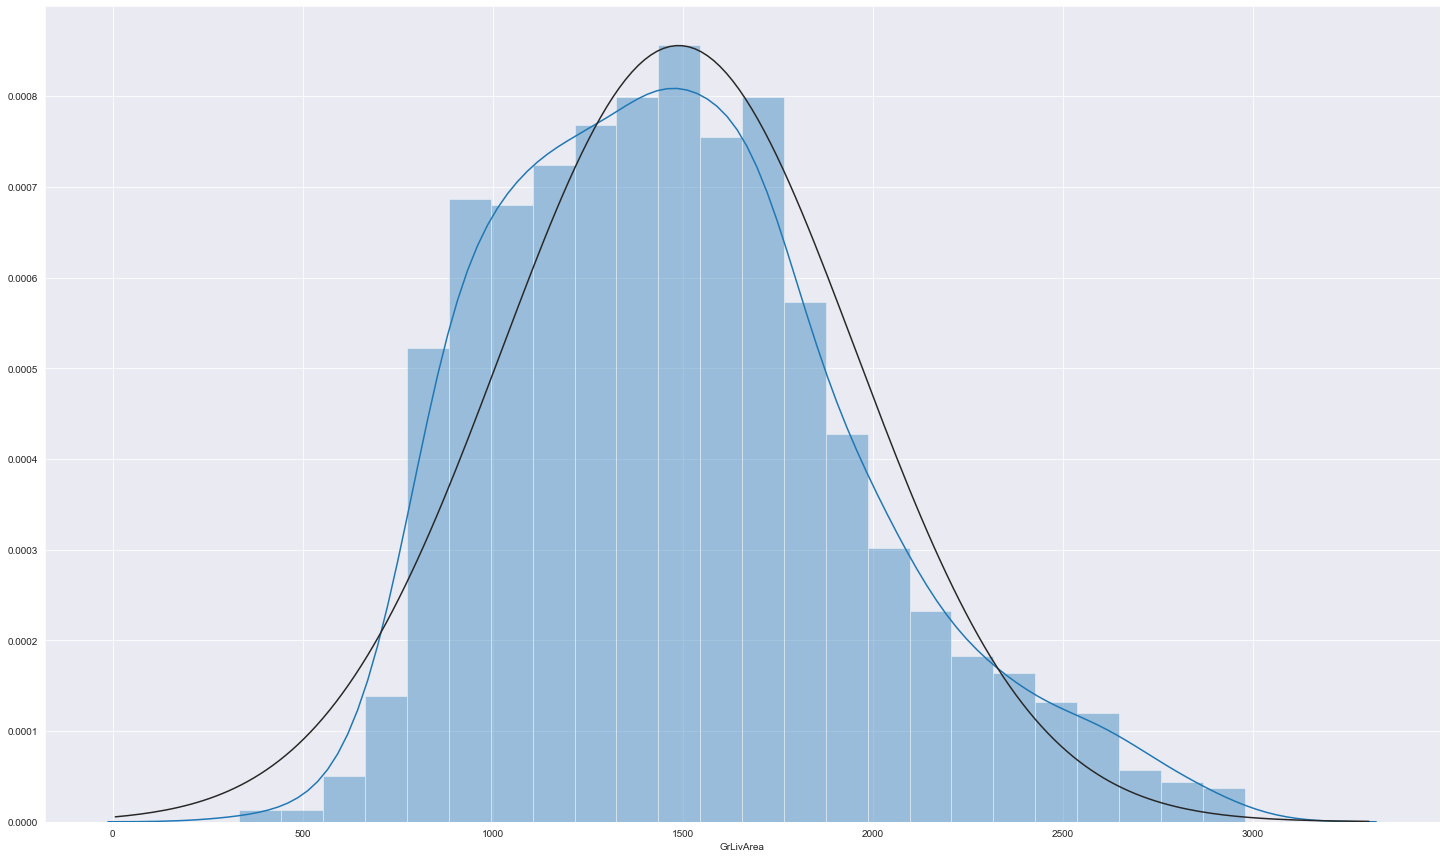

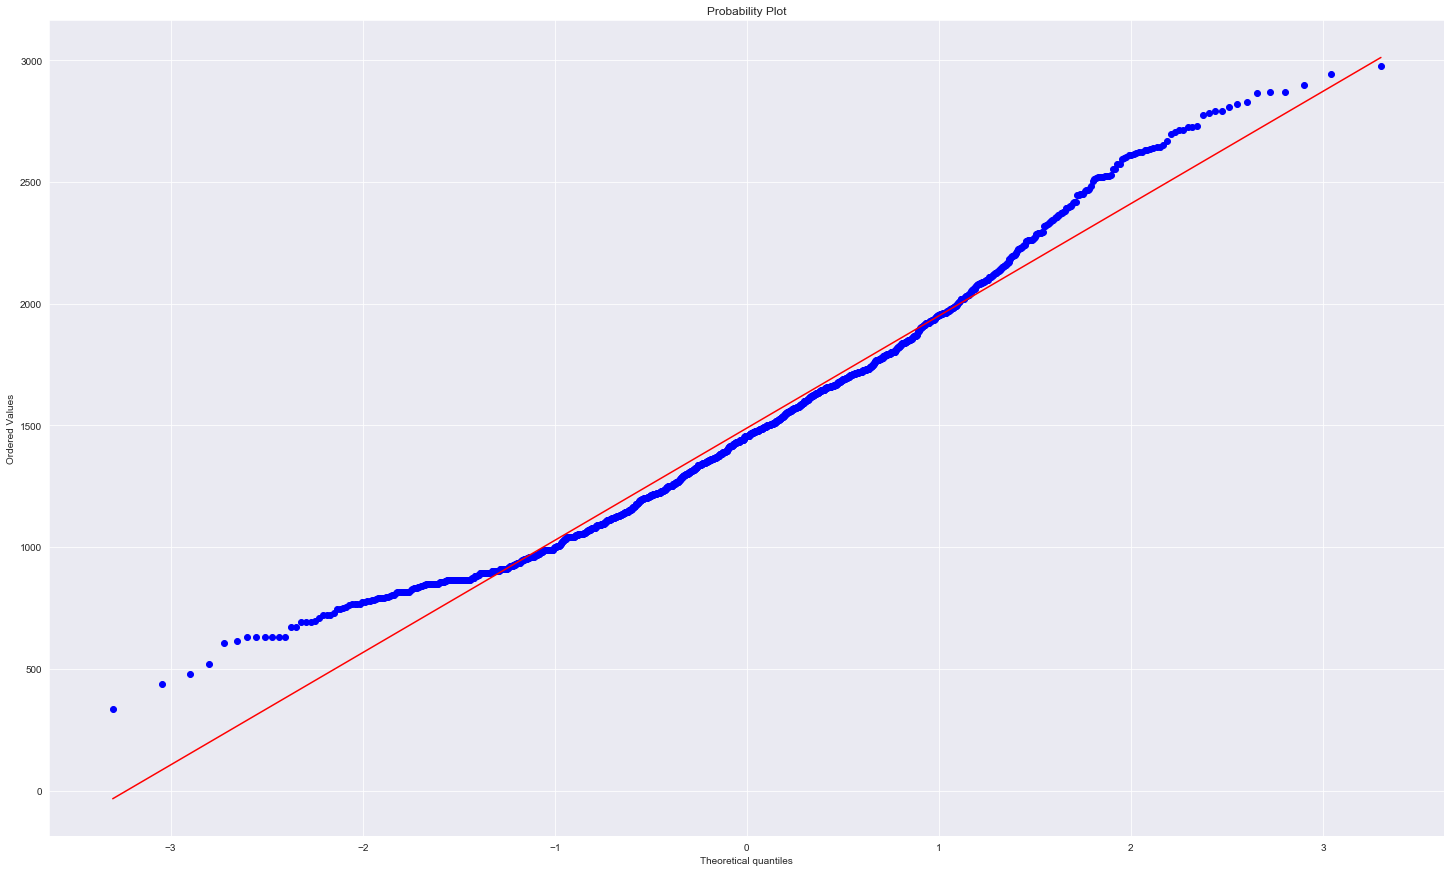

In [239]:
#histogram and normal probability plot
sns.distplot(df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['GrLivArea'], plot=plt)

Now, lets numerically calculate the skewness for the _GrLivArea_ feature.

In [240]:
skewed_grLiv = skew(df['GrLivArea'])
print(skewed_grLiv)

0.5639914400631191


For normally distributed data, the skewness should be about 0. A skewness value > 0 means that there is more weight in the left tail of the distribution.

As evident from the histogram plot, the *GrLivArea* is *Left skewed*.

Hmm... let's try removing skewness from our data.

## John's Approach 1: Replacing the data with the log, square root, or inverse transformed data may help to remove the skewness.
***

John read that applying **log transformation** on the data would reduce the skewness. It was worth a try, he thought.

Let's see how he applied Log Transform to remove the skewness in the data and plot it.

John chose to focus on the **GrLivArea** feature for which he had already calculated the skewness. 

In [241]:
#data transformation
df_trans=df.copy()
df_trans['GrLivArea'] = np.log(df_trans['GrLivArea'])

Applying log_transform on the _GrLivArea_ and plot them.

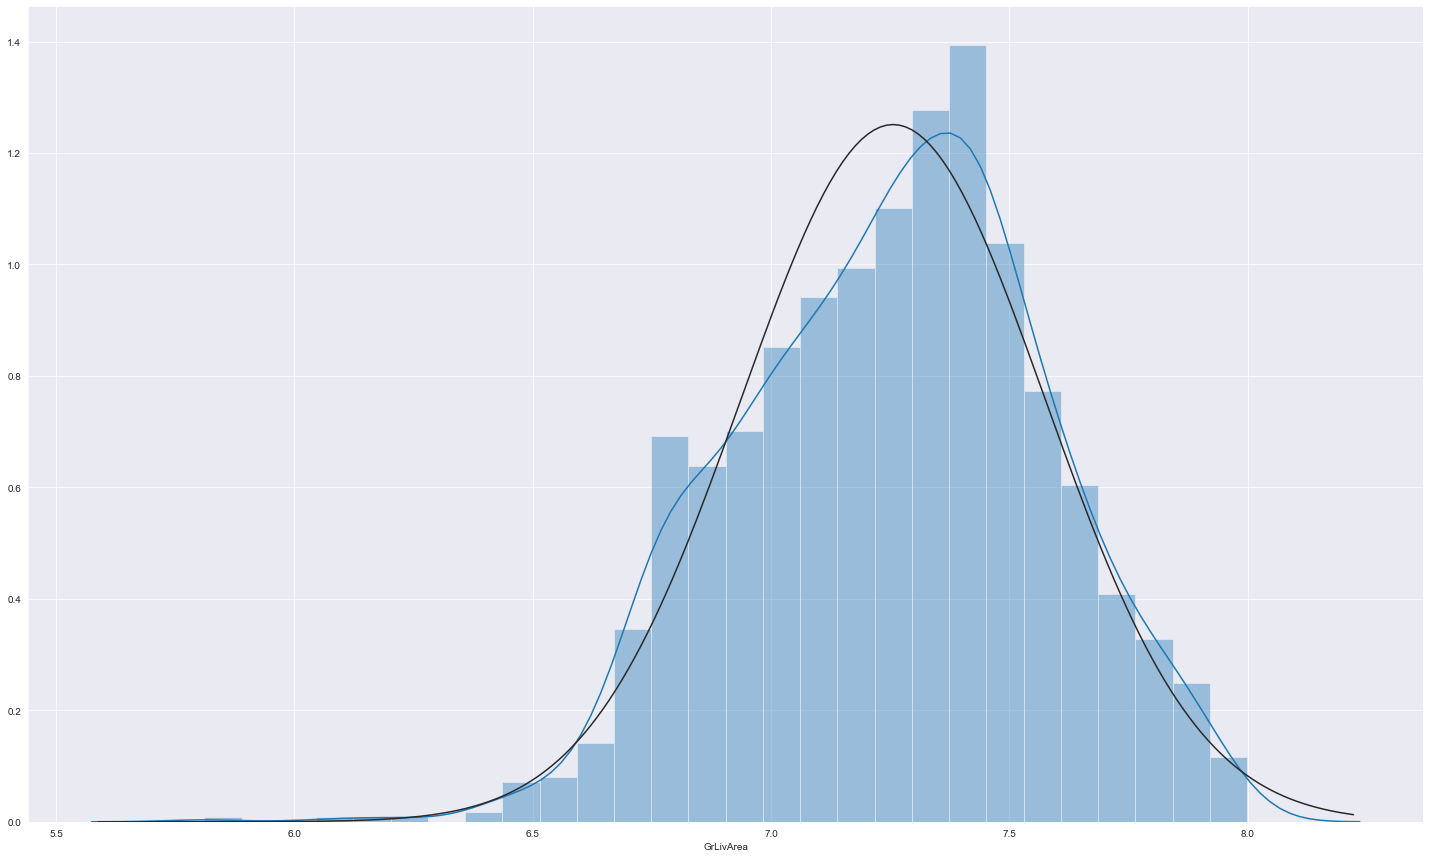

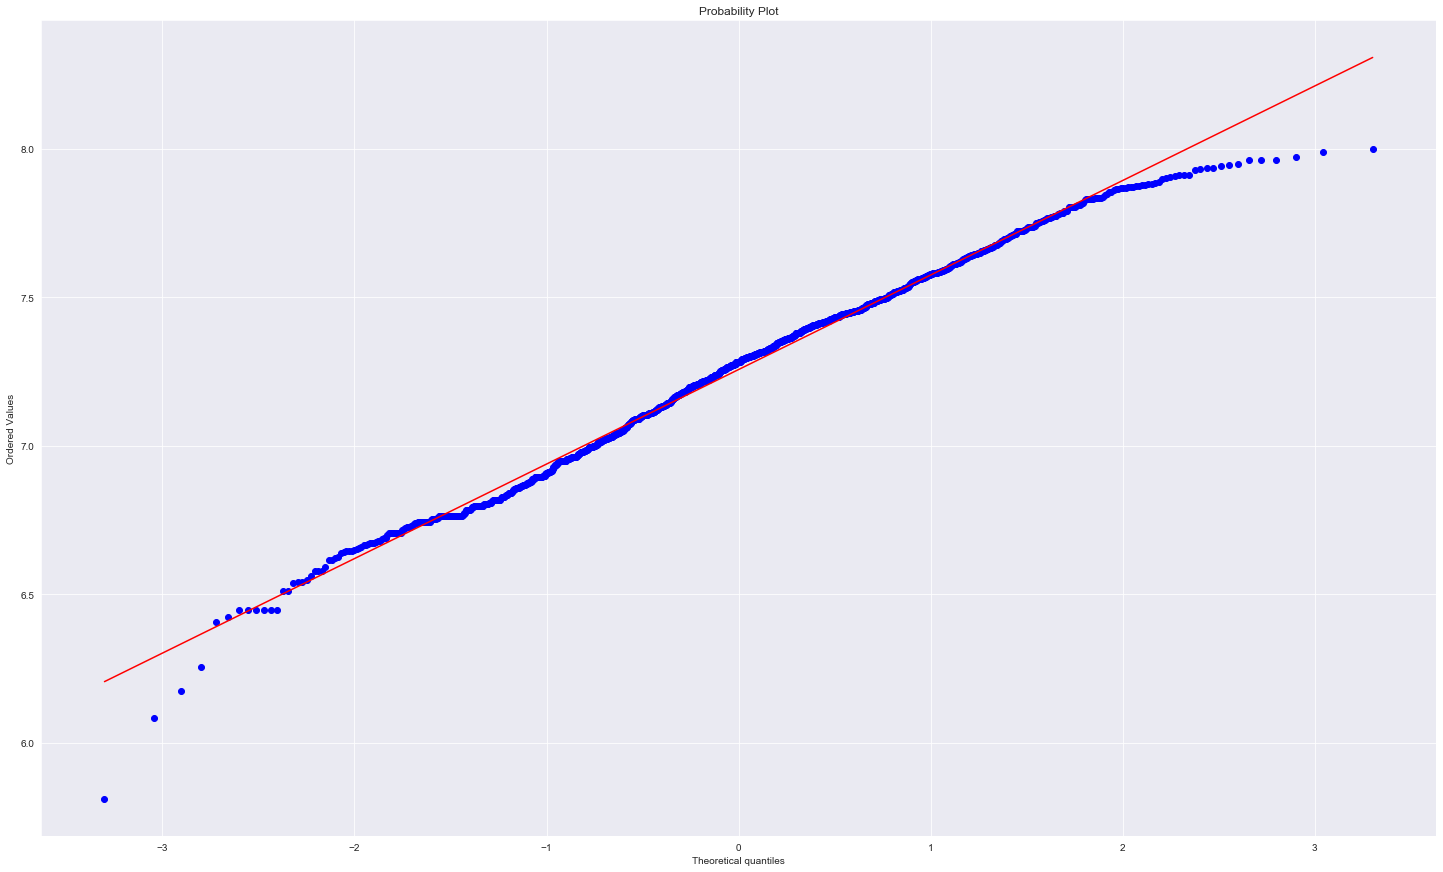

In [242]:
#transformed histogram and normal probability plot
sns.distplot(df_trans['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_trans['GrLivArea'], plot=plt)


John was happy to see that the plot is now much more symmetrical. It seems more like a bell curve now.

Let's verify the same numerically.

skewness_grLiv = skew(df_trans['GrLivArea'])
print(skewness_grLiv)

Hmm... Log transformation did remove skewness in the original data.
Quite evidently, the skewness value is now much more closer to 0.

When Jane learnt about this she informed John about another method **"Square Root Transformation"** to remove skewness in the data.

Let's see how to apply Square Root transformation

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


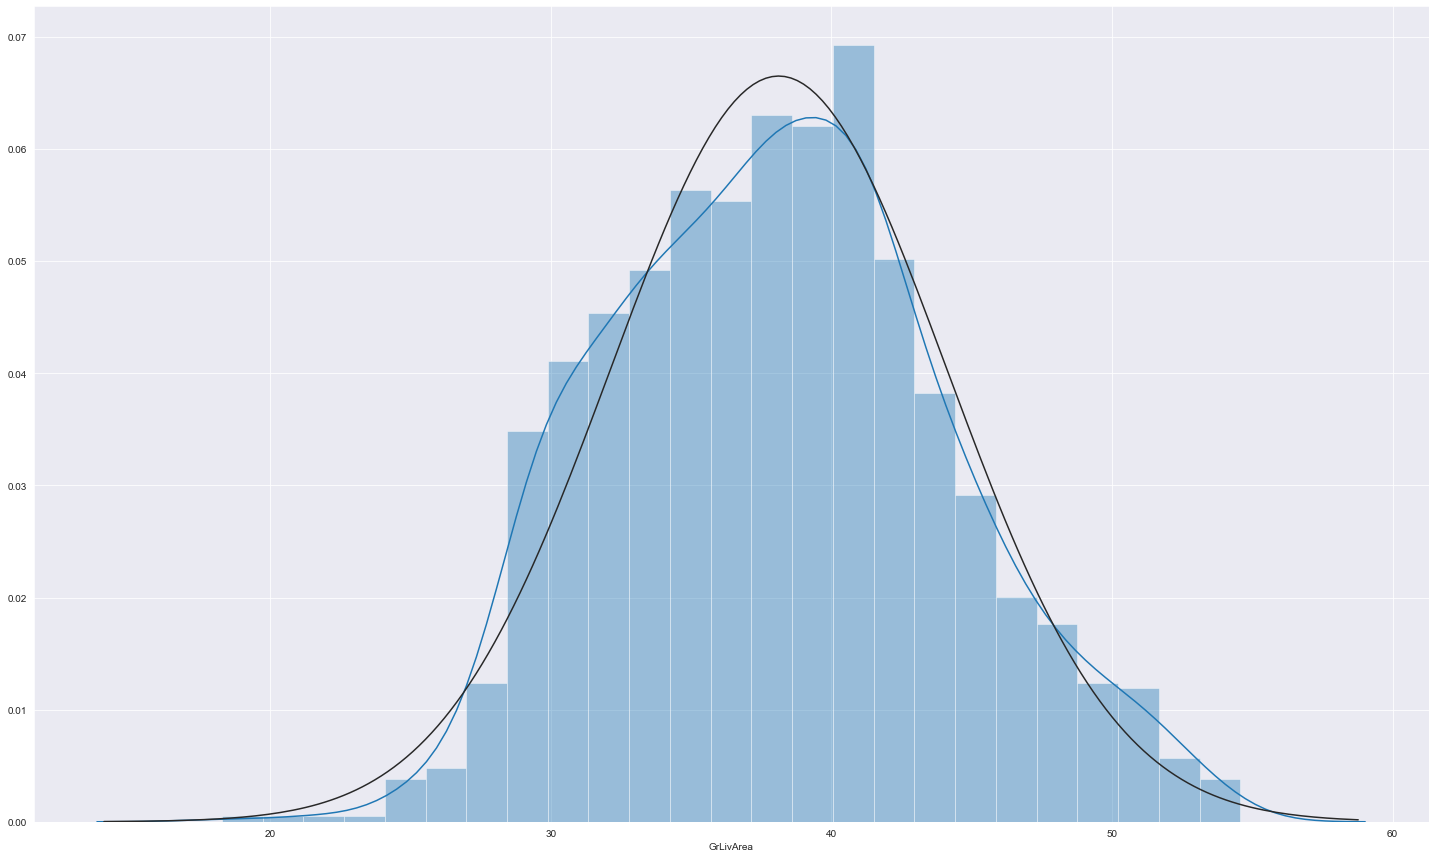

<Figure size 1800x1080 with 0 Axes>

In [243]:
df_trans = df.copy()
df_trans['GrLivArea'] = np.sqrt(df_trans['GrLivArea'])

sns.distplot(df_trans['GrLivArea'], fit=norm)
fig = plt.figure()
fig.show()

Similar to the log transform; even the square root transformation seems to reduce the skewness.

Let's verify the same numerically.

In [244]:
# Code starts here

skewness_grLiv = skew(df_trans['GrLivArea'])
print(skewness_grLiv)

0.1839657895640114


## Feature Extraction
***

After such an exhausting work, John was finally ready to apply the Linear Regression on the dataset.

## But ....
***
Linear Regression assumes that all the data, is normally distributed

"What should I do? How can I make the data have a normal distribution?" 

Finding himself again in a problem, John called up Jane.

Standardization of datasets is a common requirement for many machine learning estimators; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.


### Standardization
***
- Standardization is recommended when regression models are being built.
- Standardization of data is to have zero mean and unit variance.


Standardization cannot be performed on Categorical data, so we need to separate Numerical Features and Categorical Features.

So, Jane asked John to separate the original data into two categories : Numerical and Categorical

In [245]:
numeric_feature = [a for a in range(len(df.dtypes)) if df.dtypes[a] in ['int64','float64']]
numeric_data = df.iloc[:,numeric_feature]

In [246]:
cat_name = df.columns.difference(df.columns[numeric_feature])
cat_data = df.loc[:,cat_name]

Let's check out some of the entries in Numerical Data & Categorical Data

In [247]:
numeric_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [248]:
cat_data.head()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
Id,,,,,,,,,,,,,,,,,,,,,
1,NaN,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
2,NaN,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,...,NaN,Veenker,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
3,NaN,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
4,NaN,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,...,NaN,Crawfor,Y,NaN,CompShg,Gable,Abnorml,WD,Pave,AllPub
5,NaN,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,NoRidge,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub


However, before applying Standardization, it is required that all the data needs to be imputed.

So, let's first impute the missing values and then standardize the data.
Also, after imputing let's check all the columns once.



In [249]:
# Imputing the missing values in numeric data to futher process it for standardization
from sklearn.impute import SimpleImputer

fill_Nan = SimpleImputer(missing_values=np.nan, strategy='median')
imputed_DF = pd.DataFrame(fill_Nan.fit_transform(numeric_data))
imputed_DF.columns = numeric_data.columns
imputed_DF.index = numeric_data.index
imputed_DF.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1442 entries, 1 to 1460
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1442 non-null   float64
 1   LotFrontage    1442 non-null   float64
 2   LotArea        1442 non-null   float64
 3   OverallQual    1442 non-null   float64
 4   OverallCond    1442 non-null   float64
 5   YearBuilt      1442 non-null   float64
 6   YearRemodAdd   1442 non-null   float64
 7   MasVnrArea     1442 non-null   float64
 8   BsmtFinSF1     1442 non-null   float64
 9   BsmtFinSF2     1442 non-null   float64
 10  BsmtUnfSF      1442 non-null   float64
 11  TotalBsmtSF    1442 non-null   float64
 12  1stFlrSF       1442 non-null   float64
 13  2ndFlrSF       1442 non-null   float64
 14  LowQualFinSF   1442 non-null   float64
 15  GrLivArea      1442 non-null   float64
 16  BsmtFullBath   1442 non-null   float64
 17  BsmtHalfBath   1442 non-null   float64
 18  FullBath

Let's check out some of the entries of the Imputed DataFrame and check if any of the features contain any null value.



In [250]:
imputed_DF.head()
imputed_DF.isnull().values.any()

False

Also, let's check out some of the columns in the data

In [251]:
column_transform = numeric_data.columns
column_transform

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Now, that the missing values have been imputed, Jane asked John to move on to standardizing the data using scale() function in preprocessing module of sklearn library.

Also, check out the standardized data.


In [252]:
from sklearn import preprocessing
standardized_DF = preprocessing.scale(imputed_DF)
standardized_DF



array([[ 0.07625473, -0.21119743, -0.19454079, ..., -1.60431719,
         0.13789927,  0.40961178],
       [-0.86760206,  0.51599143, -0.0771501 , ..., -0.49422823,
        -0.61532325,  0.0430575 ],
       [ 0.07625473, -0.06575966,  0.09128002, ...,  0.98589038,
         0.13789927,  0.61325304],
       ...,
       [ 0.31221892, -0.16271817, -0.1341101 , ..., -0.49422823,
         1.6443443 ,  1.19702466],
       [-0.86760206, -0.06575966, -0.06520687, ..., -0.86425788,
         1.6443443 , -0.49150081],
       [-0.86760206,  0.27359514, -0.04274952, ..., -0.12419858,
         0.13789927, -0.41852936]])

## Scaling
***
After observing the data, John realised that it wasn't a great idea to compare two entirely different things.

For eg : It wouldn't be wise to compare GrLivArea(squarefoot) and YrSold(time) even though both are numerical features.


When there are predictors with different units and ranges, the final model will have coefficients which are very small for some predictors and it makes it difficult to interpret.

He needs to somehow **scale down everything in a range**, so that the model's prediction is not affected by the different units at all.

**Scaling**

An alternative standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size.

Centering and Scaling will improve the numerical stability of some models

But Standardization cannot be applied on categorical data, hence we split the categorical and numerical data in order to standardize the numerical data.



In [253]:
# Standardizing numerical features
from sklearn.preprocessing import StandardScaler
stand_scale= StandardScaler()
imputed_DF.loc[:, column_transform] = stand_scale.fit_transform(imputed_DF.loc[:, column_transform])
imputed_DF.head()



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,0.076255,-0.211197,-0.194541,0.682599,-0.518955,1.054794,0.882718,0.560747,0.632594,-0.288541,...,-0.746410,0.228068,-0.364331,-0.117073,-0.270177,-0.052286,-0.088238,-1.604317,0.137899,0.409612
2,-0.867602,0.515991,-0.077150,-0.053057,2.198961,0.154234,-0.421313,-0.580575,1.267655,-0.288541,...,1.650317,-0.706060,-0.364331,-0.117073,-0.270177,-0.052286,-0.088238,-0.494228,-0.615323,0.043058
3,0.076255,-0.065760,0.091280,0.682599,-0.518955,0.988086,0.834421,0.362763,0.118941,-0.288541,...,-0.746410,-0.062890,-0.364331,-0.117073,-0.270177,-0.052286,-0.088238,0.985890,0.137899,0.613253
4,0.312219,-0.453594,-0.082254,0.682599,-0.518955,-1.880365,-0.711098,-0.580575,-0.511451,-0.288541,...,-0.746410,-0.170085,4.214305,-0.117073,-0.270177,-0.052286,-0.088238,-1.604317,-1.368546,-0.520350
5,0.076255,0.709908,0.398537,1.418255,-0.518955,0.954732,0.737826,1.457500,0.513520,-0.288541,...,0.797790,0.580281,-0.364331,-0.117073,-0.270177,-0.052286,-0.088238,2.095979,0.137899,0.973019


### Algebraic Transformations
***

John is now thorough with Polynomial Features and dealing with skewness using log transformation and square root transformation.

All of these, fall under **ALGEBRAIC TRANSFORMATIONS.**

John has already observed that transforming a variable into another form drastically improves a model’s performance.

Let's look at another example.

Here, John plots the distribution plot and probablity plot for TotalBsmtSF. 

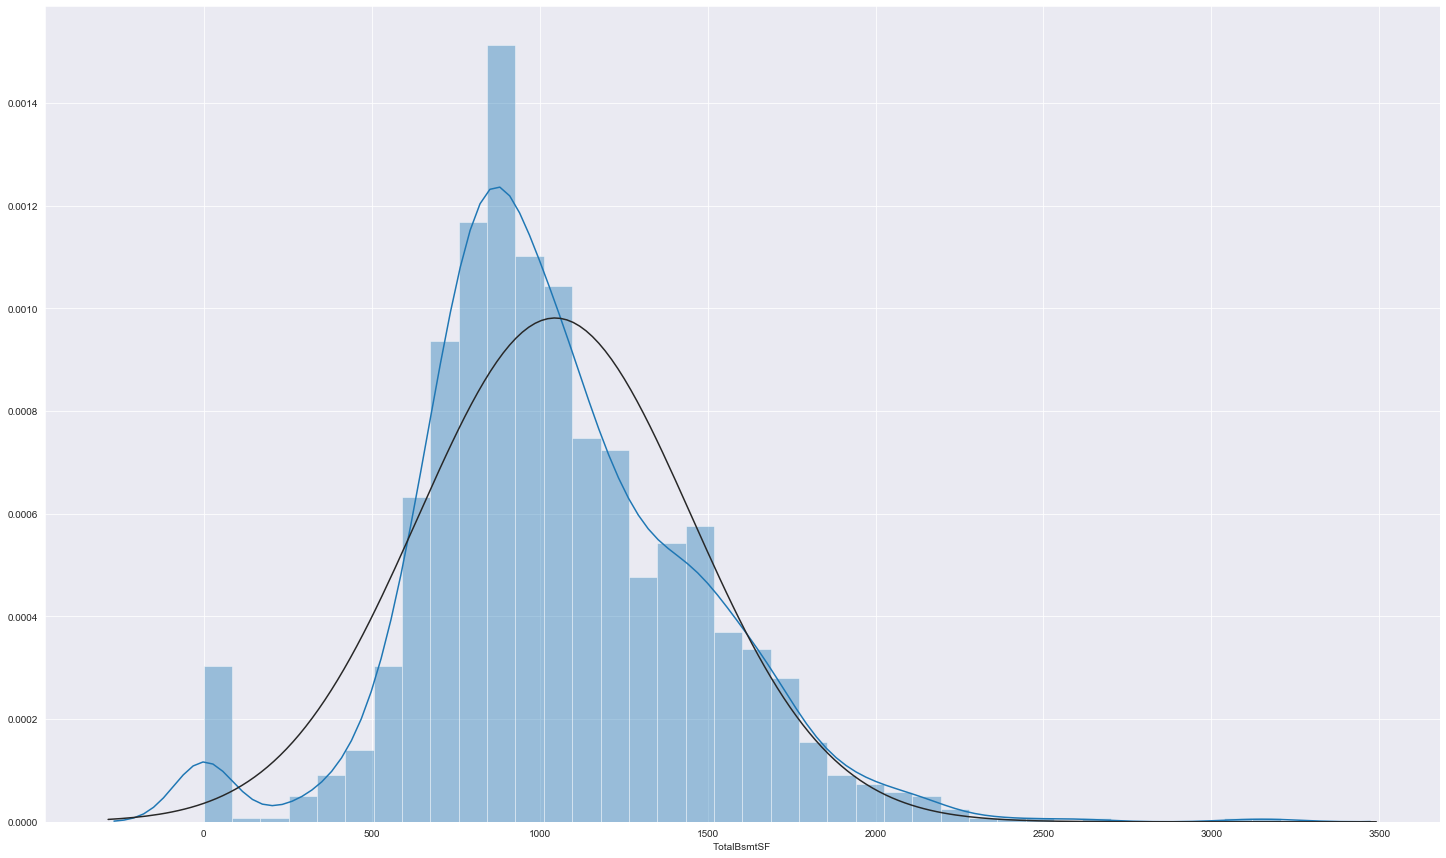

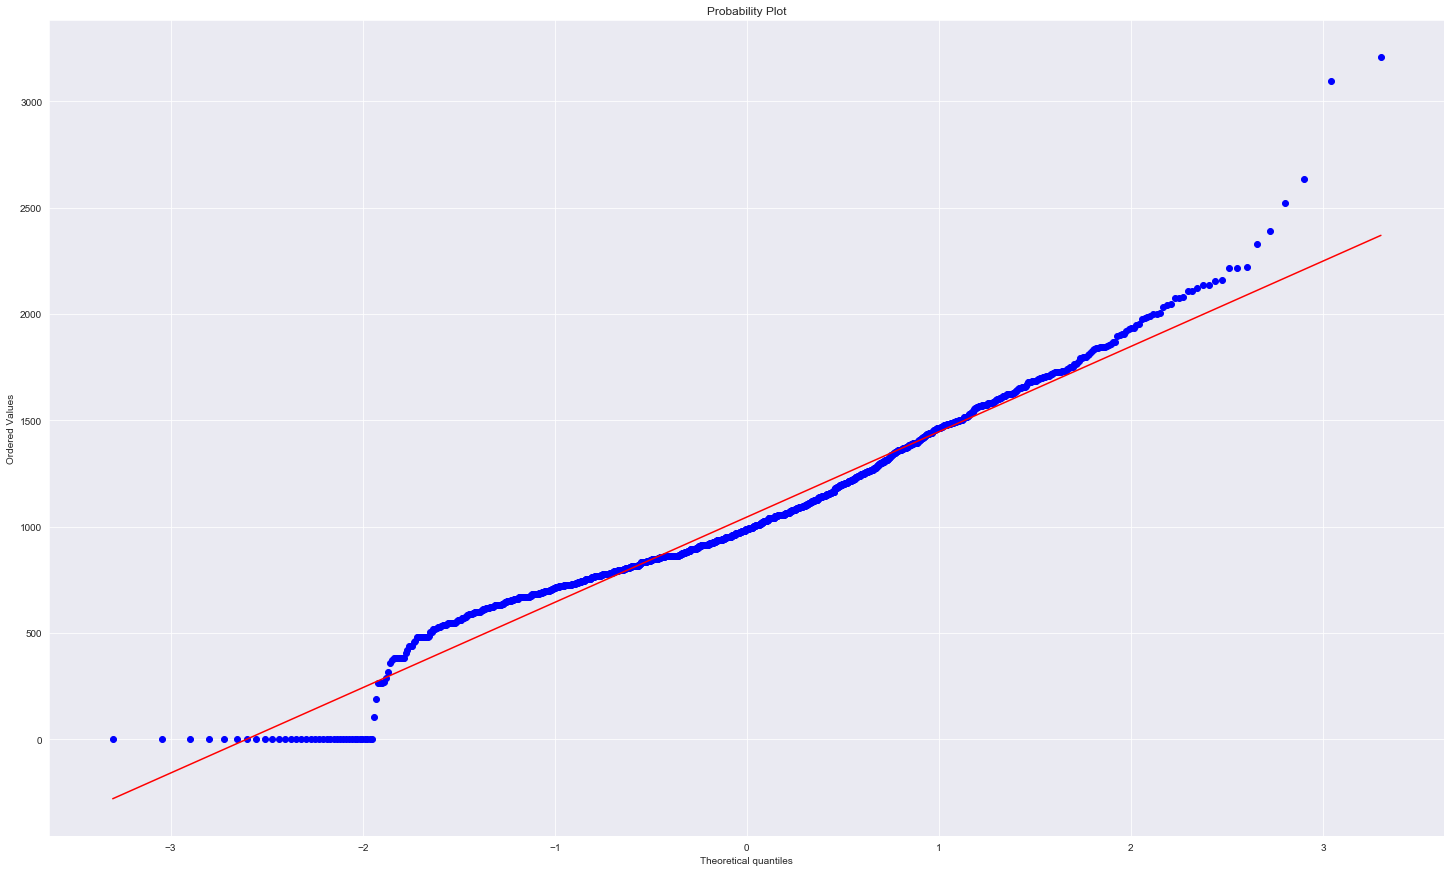

In [254]:
#histogram and normal probability plot
sns.distplot(df['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['TotalBsmtSF'], plot=plt)

John faced a problem while looking through the observations of variable `TotalBsmtSF`

- A significant number of observations with value zero (houses without basement) as evident by the horizontal section of the blue line.
- A big problem because the value zero doesn't allow us to do log transformations.

Jane to the rescue again!! She suggested to apply a sqrt transformation here, he will have to create a variable that can get the effect of having or not having basement (binary variable). 

John, then, did a log transformation to all the non-zero observations, ignoring those with value zero. This way one can transform data, without losing the effect of having or not basement.

If the house has a basement then we add them to a different column, else ignore it.


In [255]:
#create column for new variable 
#if area>0 it gets 1, for area==0 it gets 0

df['NewBsmt'] = 0
df.loc[df.TotalBsmtSF > 0, "NewBsmt"] = 1
len(df.loc[df['NewBsmt'] == 1])



1405

Now, let's apply square root transform over this new column & then replot the histogram and probability plot for it.

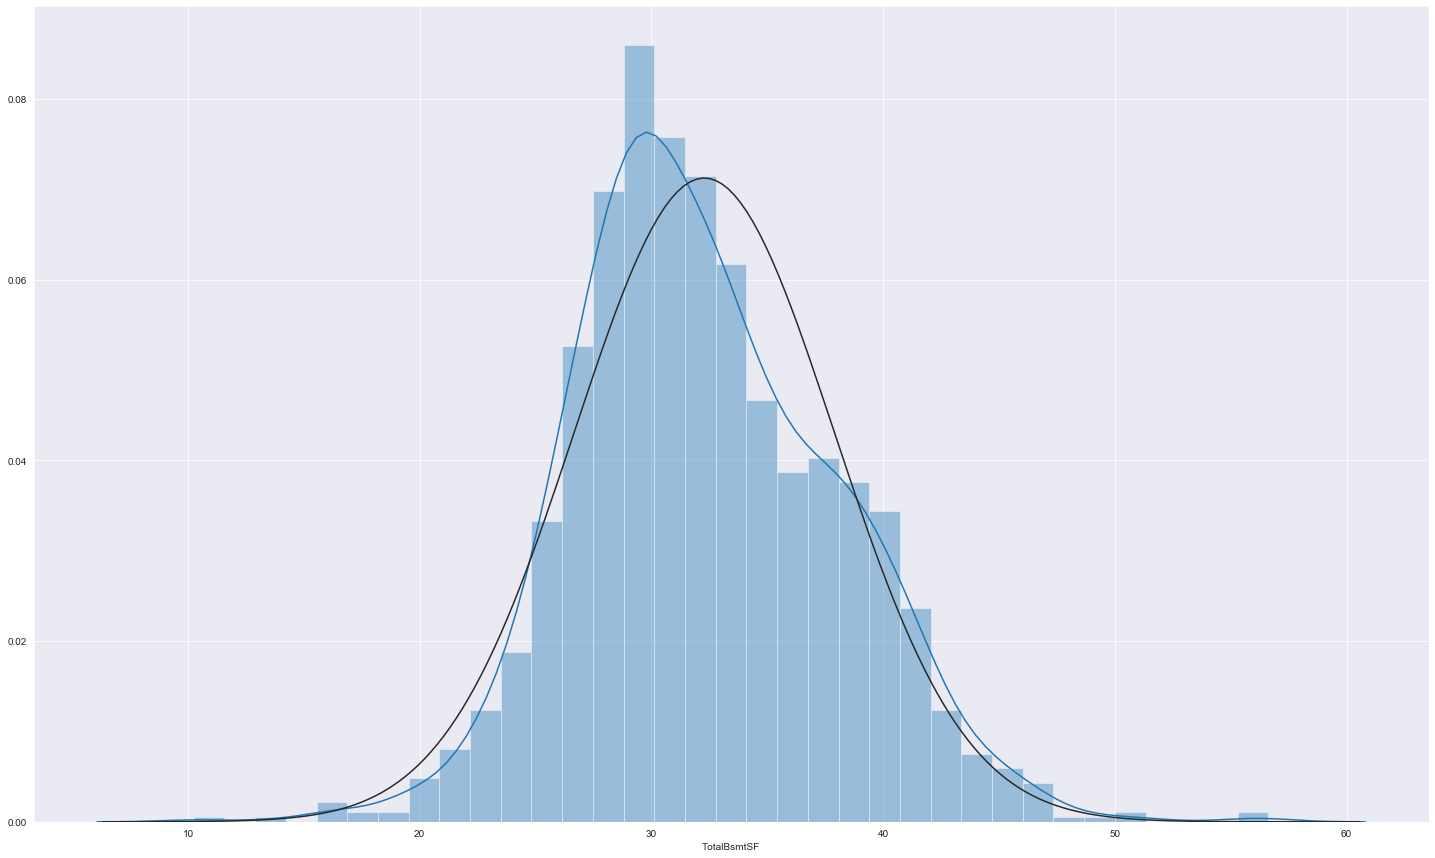

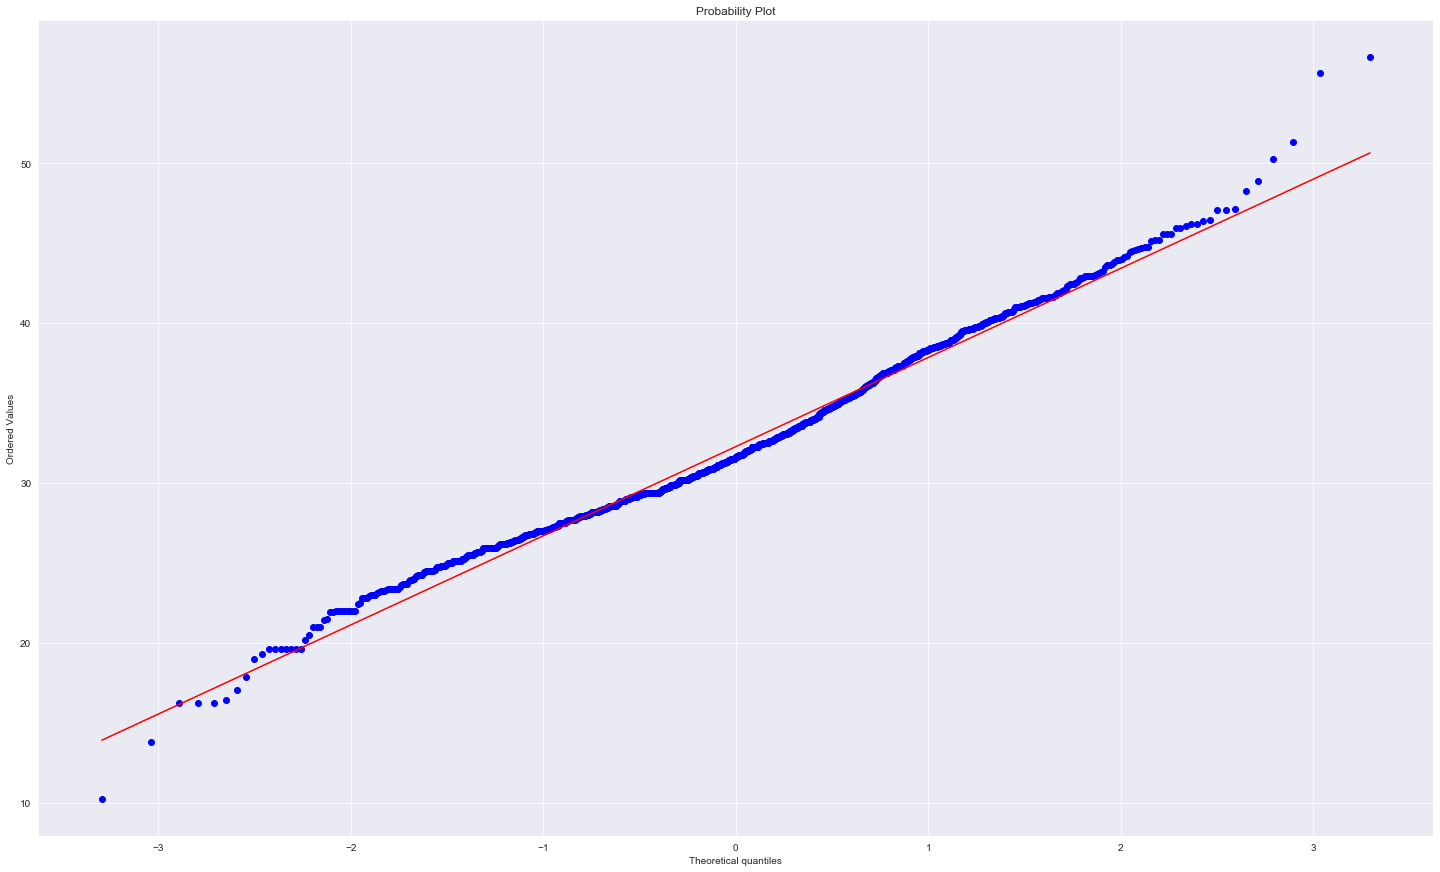

In [256]:
# transform data
df.loc[df.NewBsmt == 1,'TotalBsmtSF'] = np.sqrt(df['TotalBsmtSF'])

# histogram and normal probability plot
sns.distplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)



So, far we have covered log and sqrt tranformations,
Here are a few more useful transforms:

- Exponential Transform
- Tanh Transform
- Polynomial Transform


# Feature Engineering
***

John was now observing the data more better then ever. After a few minutes of skimming through the data, he observed that there were few insignificant columns present in the data.

For eg; the following features conveyed the same thing :
- BsmtFullBath
- FullBath
- HalfBath

So, it would be wise to combine all these features together into a single column, just to save some time and space.

Unknowingly, partly what John was doing and now, what he's thinking to do is nothing but **FEATURE ENGINEERING.**

Seems, like few things start becoming obvious with time.

## So, what is feature engineering?
***

Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. Feature engineering is fundamental to the application of machine learning, and is both difficult and expensive. 

Coming up with features is difficult, time-consuming, requires expert knowledge. "Applied machine learning" is basically feature engineering. (Andrew Ng)
... some machine learning projects succeed and some fail. 




**What makes the difference?**

Easily the most important factor is the features used. (Pedro Domingos)

Feature Engineering: The art of coming up with new features with more predictive power using

- experience
- domain expertise
- empirical processes



Most important techniques in feature engineering

- Applying Domain Expertise
- Combining Feature
- Encoding of categorical variables
- Time series feature extraction
- NLP feature extraction



### Applying Domain Expertise
***
Domain expertise or domain knowledge is nothing but expertise in a particular field , and when I say field it can mean anything like field of Education, Healthcare, Consumer Goods, Retail and the list is endless. 
A domain expert is someone who is not related to the technology aspect but has indepth knowledge about the particular industry, how is it shaping up, the trends, what are the things that will impact the industry.

For example, if you are called into develop a particular application for a consumer goods company and specifically a Apparel & Footwear company.
The application that you build has to be that compliments the industry and the various facets of it, and you as a technology guy wouldnt know it, this is where a domain expert will come in and explain how that industry works and what would be the best way to have the application built.

### Combining Feature
***
This is one of the crucial part of feature engineering which involves going through the data set variable and understanding the variable(s) and hence combining one or more features to create and new features. This involves some what on intutive decision making and little bit research about the domain of the data set.

This Step basically is used in order to hike the performance of the model which is fitted on the data.

So, let's combine 4 different features `BsmtFullBath`, `BsmtHalfBath`, `FullBath`, `HalfBath` into a single feature `TotalBath`.

Below, we have added all these 4 features in different proportions, to combine them.

In [257]:
# Create new features by combining the existing features

# Overall pool score
df["PoolScore"] = df["PoolArea"] * df["PoolQC"]

# Total number of bathrooms
df["TotalBath"] = df["BsmtFullBath"] + (0.5 * df["BsmtHalfBath"]) + df["FullBath"] + (0.5 * df["HalfBath"])


### Encoding of categorical variables
***
So far John had been focusing much on numerical features. 
He observed that few columns such as ``, `` contain `string` values.

Well, what about it?
It wouldn't matter much, he thought.
But oh boy, was he in for a surprise?

We had learned **Numpy** remember?
Numpy functions work well only with numbers, however when worked with formats other then `int` or `float`, would either give us gibberish result or would give us errors.

So, John now had to convert these categorical features into numbers or vectors or something similar.
How do I do that?

After struggling for a while, he found the solution.
He can do Encoding i.e. encode the string into numbers.

Luckily, sklearn provides us functions to do this work.

Let's Label Encode the `MSZoning` column to numerical features.
Currently this column contains values 'RF', 'RL' and other values. We will change it with numbers\vectors.



## What is Encoding?
***
Most algorithms we use work with numerical values whereas more often than not categorical data are in text/string (male, female) or bin (0-4, 4-8 etc.) form.

One option is to leave these variables out of the algorithms and use only numeric data. But in doing so we can lose out on some critical information.

Hence, it is generally a good idea to include the categorical variables into your algorithms by encoding them to convert to numeric values
But, first let's learn a thing or two about our categorical variables.

Encoding a categorical variable is to categorize them into numerical features.


### Label Encoding
***
Since different kinds of categorical variables capture different amount of information, we need different techniques to encode them.

Label Encoding: Each category is given one label e.g. 0, 1, 2 etc.

Label encoding is a handy technique to encode categorical variables. However, such encoded nominal variables might end up in being misinterpreted as ordinal.

However, nonlinear models like decision trees can handle such encoding

Let's apply Label Encoding on all the categorical features in our dataset. 



In [258]:
from sklearn.preprocessing import LabelEncoder

#Auto encodes any dataframe column of type category or object.

def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df
    

### Categorical Dataset

In [259]:
dummyEncode(cat_data)
cat_data.head()

Error encoding Alley
Error encoding BsmtCond
Error encoding BsmtExposure
Error encoding BsmtFinType1
Error encoding BsmtFinType2
Error encoding BsmtQual
Error encoding Electrical
Error encoding Fence
Error encoding FireplaceQu
Error encoding GarageCond
Error encoding GarageFinish
Error encoding GarageQual
Error encoding GarageType
Error encoding MasVnrType
Error encoding MiscFeature
Error encoding PoolQC


,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
Id,,,,,,,,,,,,,,,,,,,,,
1,NaN,0,TA,No,GLQ,Unf,Gd,1,2,2,...,NaN,5,2,NaN,0,1,4,8,1,0
2,NaN,0,TA,Gd,ALQ,Unf,Gd,1,1,2,...,NaN,24,2,NaN,0,1,4,8,1,0
3,NaN,0,TA,Mn,GLQ,Unf,Gd,1,2,2,...,NaN,5,2,NaN,0,1,4,8,1,0
4,NaN,0,Gd,No,ALQ,Unf,TA,1,2,2,...,NaN,6,2,NaN,0,1,0,8,1,0
5,NaN,0,TA,Av,GLQ,Unf,Gd,1,2,2,...,NaN,15,2,NaN,0,1,4,8,1,0


Let's try Label Encoding explicitly on the 'MSZoning' column.



In [260]:
from sklearn.preprocessing import LabelEncoder
lablel_encoder = LabelEncoder()
df['MSZoning'] = lablel_encoder.fit_transform(df['MSZoning'])
df['MSZoning']



Id
1       3
2       3
3       3
4       3
5       3
       ..
1456    3
1457    3
1458    3
1459    3
1460    3
Name: MSZoning, Length: 1442, dtype: int32

As evident, now the column `MSZoning` only contains numerical values, rather then String.

**Encoding can be performed on the following type of variables : **

#### NOMINAL VARIABLES
***
Consider following three categorical variables and their values

**Colour**: Blue, Green, Red, Yellow

**Educational Qualification**: Primary School, Secondary School, Graduate, Post-Graduate, Phd.

**Salary Bracket**: 0-50,000, 50,001-100,000, 100,001-150,000, 150,001-200,000

Although all three of them are categorical variables, they are different in the amount of information they convey. 
Let's look at them one by one.

Colour conveys blue is different from red. That's all. The value of the variable is not meant to capture any relative difference among the values. Such variables are called `Nominal Variables`.

#### ORDINAL VARIABLES
***
Now consider educational qualification.

The value "graduate" does not only conveys that it is different from value say "Primary school", it also implies that it is more in terms of qualification than "Primary School". 

Such variables are called `Ordinal Variables` because they convey a sense of order.

In our example, Primary School < Secondary School < Graduate < Post-Graduate < Phd. (in terms of qualification)



#### INTERVAL VARIABLES
***
The third variable, salary bracket is similar to educational qualification by conveying order (a person earning 50,001-100,000 earns more salary than 0-50,000). 

However, here, apart from knowing the order, we also know the interval between the values. 

Here we can say that the averages of each of the values are separated by 50,000. Such variables are called `Interval variables`.

There are two types of broadly used algorithm which performs the task of encoding of variables.

Let's have a look at these algorithms.


## One hot encoding
***
After studying Label Encoding, John wondered what would happen if the Categories contained more then one string values.
For eg; instead of `RL`, `ML` as values for the `MSZoning`, it contained `RL+AB` and `ML+CD` or something similar?
He wondered, whether he could have been able to apply the Label Encoding then.

Out of curiousity, he started browsing over the internet, and within few clicks of Google Search.
The answer turned out to be **One Hot Encoding**



## What is One Hot Encoding?
***
A dataset with more dimensions requires more parameters for the model to understand, and that means more rows to reliably learn those parameters.

The effect of using One Hot Encoder is addition of a number of columns (dimensions).

If the number of rows in the dataset is fixed, addition of extra dimensions without adding more information for the models to learn from can have a detrimental effect on the eventual model accuracy.
One way to deal with this `curse of dimensionality` is using hashing techniques.

<img src = "../images/screenshot-docs.google.com-2017-09-27-10-58-21-457.png" >




In [261]:
pd.get_dummies(cat_data, drop_first=True) #one hot encoding

,BldgType,CentralAir,Condition1,Condition2,ExterCond,ExterQual,Exterior1st,Exterior2nd,Foundation,Functional,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,PoolQC_Gd
Id,,,,,,,,,,,,,,,,,,,,,
1,0,1,2,2,4,2,12,13,2,6,...,0,0,0,1,0,0,0,0,0,0
2,0,1,1,2,4,3,8,8,1,6,...,0,0,0,0,1,0,0,0,0,0
3,0,1,2,2,4,2,12,13,2,6,...,0,0,0,1,0,0,0,0,0,0
4,0,1,2,2,4,3,13,15,0,6,...,0,0,1,0,1,0,0,0,0,0
5,0,1,2,2,4,2,12,13,2,6,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0,1,2,2,4,3,12,13,2,6,...,0,0,0,0,1,0,0,0,0,0
1457,0,1,2,2,4,3,9,10,1,2,...,0,0,0,0,0,1,0,0,0,0
1458,0,1,2,2,2,0,5,5,4,6,...,0,0,0,0,1,0,0,1,0,0


### In Class Activity:

## Automobile Dataset

### Problem Statement :

This dataset consist of data From 1985 Ward's Automotive Yearbook. It consists of three types of entities:
- The specification of an auto in terms of various characteristics
- Its assigned insurance risk rating 
- Its normalized losses in use as compared to other cars.



### About the DataSet :

Below are the features in the dataset and their description

|Features|Description|
|-----|-----|
|symboling|It is a risk factor symbol associated to the price & corresponds to the degree to which an automobile is more risky than its price indicates. +3 indicates risky, -3 indicates safety|
|make|Indicates the maker or manufacturer of the automobile|
|fuel-type|Indicates the type of fuel - diesel or gas|
|body-style|Indicates whether the body shape of automobile is a hardtop, wagon, sedan, hatchback or convertible|
|drive-wheels|Indicates the configuration of drive wheels for the automobile|
|wheel-base|It is the distance between the centers of the front wheel and the rear wheel. It is continuous ranging from 86.6 120.9|
|length|Indicates length of the automobile and ranges from 141.1 to 208.1.|
|width|Indicates width of the automobile and ranges from 60.3 to 72.3|
|height|Indicates the width of the automobile and ranges 47.8 to 59.8|
|horsepower|Maximum horsepower the automobile engine can output and ranges from 48 to 288|
|peak-rpm|RPM is a way to measure how many times per minute components in the engine rotate. It ranges from 4150 to 6600|
|highway-mpg|Indicates the miles per galon typically consumed at highways. It is continuous from 4150 to 6600|
|city-mpg|Indicates the miles per galon typically consumed at cities. It is continuous from 13 to 49|
|price|Indicates the price of the automobile and ranges from 5118 to 45400|
|normalized-losses|It is a continuous variable ranging from 65 to 256|
|engine-location|Indicates the location of the engine - front or rear|
|engine-type|Indicates the type of engine.|
|engine-size|It is continuous from 61 to 326|


### Load and understand your data
- The data consists of 205 instances and 14 features

In [262]:
df = pd.read_csv('../data/Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


### Check the number of null values in each column get a general description of your data

In [263]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


####  What insights do you get from the data?

- There are no null values in each column.
- The `.describe()` function outputs 8 numbers for each column in the dataset. 
    - The first value 'count' shows how many rows have non-missing values
    - The second value is the mean, which is the average. 
    - std is the standard deviation, which measures how numerically spread out the values are.
    - For all the below values the data should be arranged in ascending order first.
        - min and max represent the minimum and maximum values in that column
        - The value 50% represents the median in every column.
        - 25% represents the value which lies above the 25% of the values in the data.
        - 75% represents the value which lies above the 75% of the values in the data.

### Plot a histogram showing the distribution of the car prices (target variable) and if any skewness, print the value of skewness

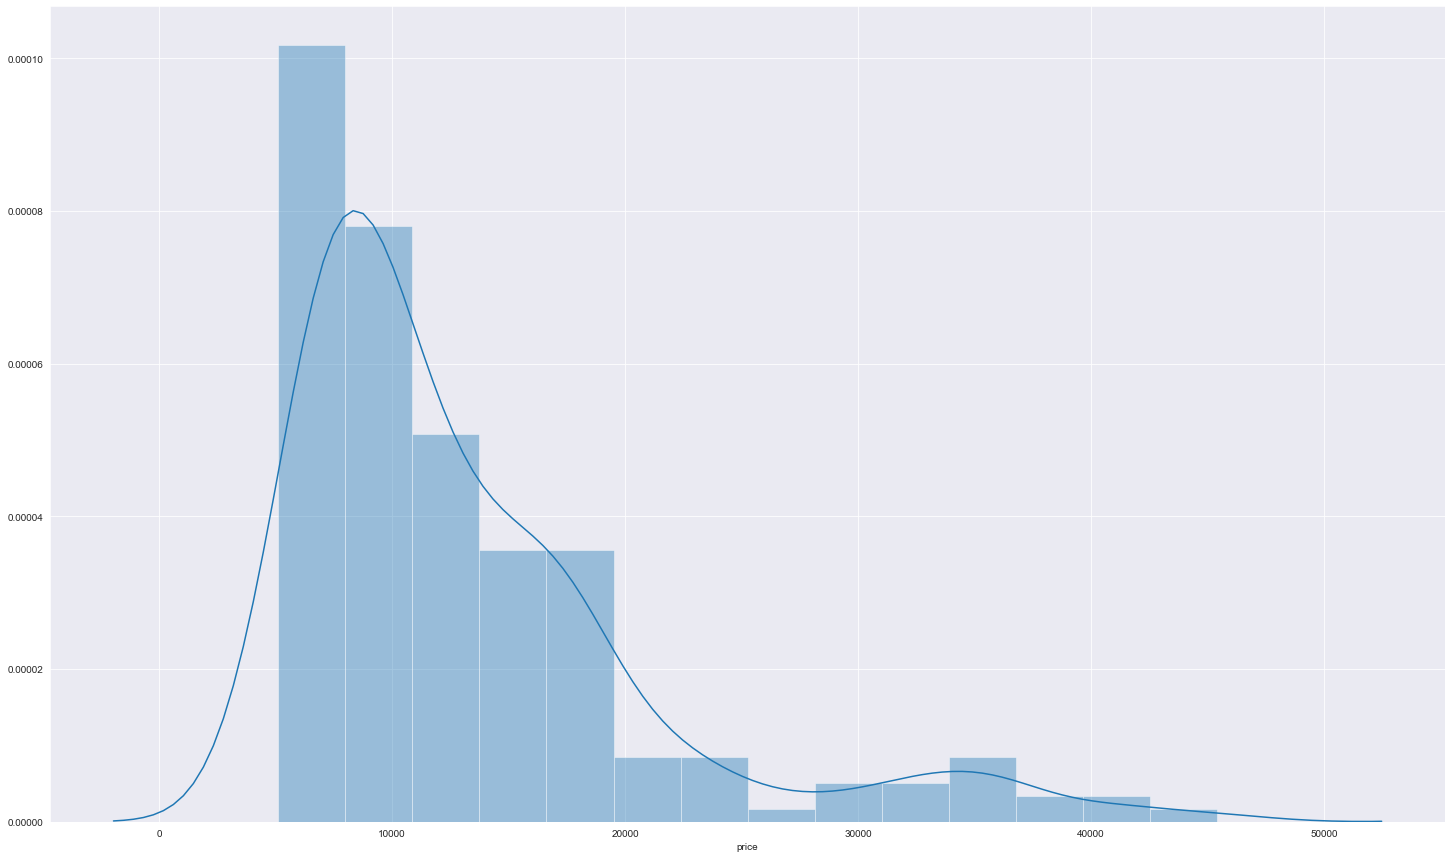

In [264]:
sns.distplot(df['price'],kde=True)

#### Is there a skewness?
- There exists a skewness towards the right.

In [265]:
df['price'].skew()

1.8051729985694338

### Plot the pearson correlation of all the features in a heatmap.

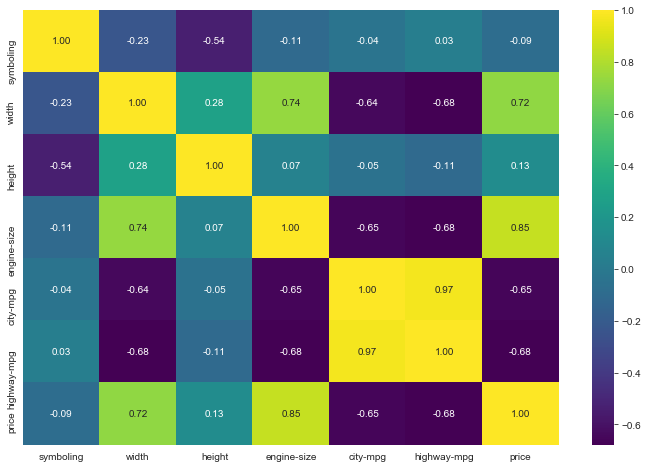

In [266]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='viridis',annot=True, fmt='.2f')

The pearson correlation coefficients calculated above are only for continuous features. The color table index next to the heatmap shows the varying levels of correlation.

A high negative correlation is denoted by darker shades and features having a high positive correlation are indicated by lighter shades

**Insights: There are some good inferences we can take it from the correlation heat map.**

- Wheel base is highly correlated with length and width of the car.

### Plot a boxplot that shows the variability of each 'body-style' with respect to the 'price'.

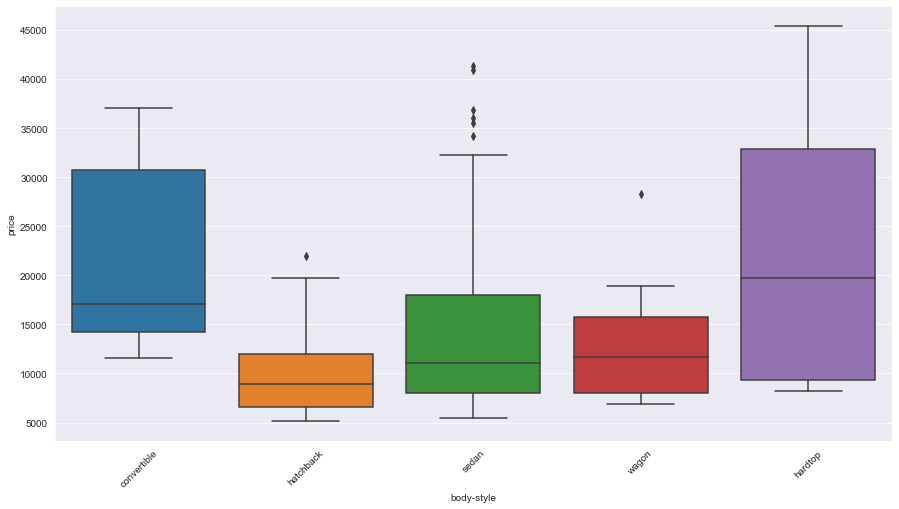

In [267]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot('body-style', 'price', data=df)

#### Does any body-style has Outliers?

- The four boxes for every body type represent the interquartile ranges for each of them and the lines within every box represent the median.
- The dotted points for hatchback, sedan and wagon are outliers.

### Plot a boxplot showing the variablity in the 'price' for each 'make' of the car 

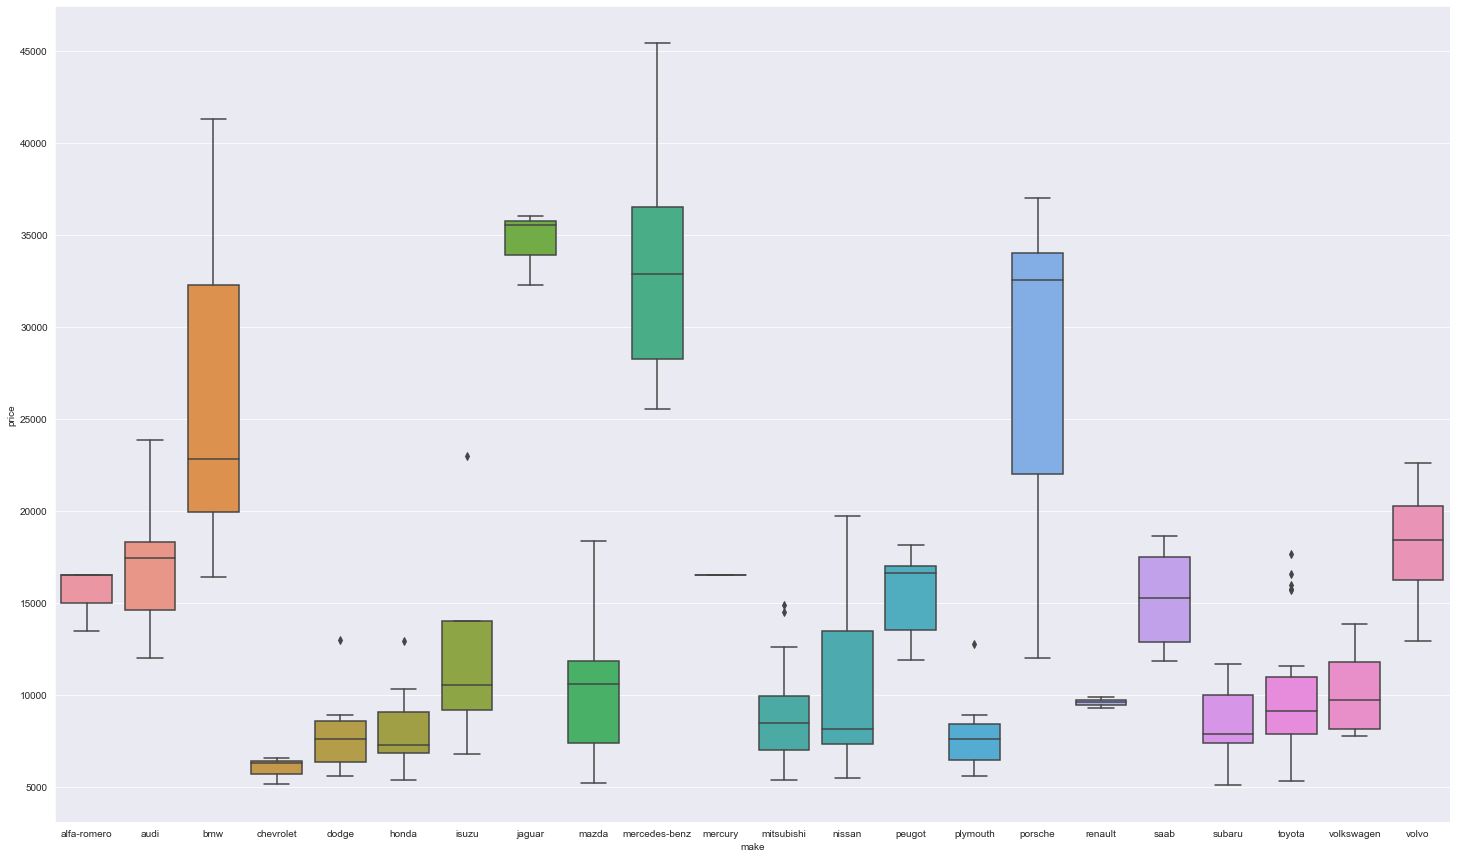

In [268]:
plt.rcParams['figure.figsize']=(25,15)
sns.boxplot('make','price',data=df)

- What are the insights you get from this plot?
   
    - The premium cars costing more than 20000 are BMW, Jaguar, Mercedes benz and Porsche
    - The most expensive car is manufactured by Mercedes benz and the least expensive is Chevrolet
    - Rest of the cars are in the midrange between 10000 and 20000 which has the highest number of cars
    - Less expensive cars costing less than 10000 are Chevrolet, Dodge, Honda, Mitsubishi, Plymoth and Subaru

## Data Preprocessing for the Automobile dataset

In [269]:
automobile = pd.read_csv('../data/Automobile_data.csv')
automobile.head()
#y = automobile[["price"]]
#automobile.drop("price",1,inplace=True)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


### Find out number of records having '?' value for normalized losses

In [270]:
# Number of records having '?' value
automobile['normalized-losses'].loc[automobile['normalized-losses'] == '?'].count()

41

### Impute the missing values of the numerical data with mean of the column (`normalized-losses and horsepower`)  (Make sure you replace "?" by "NaN" for entire dataset before Imputing).

In [271]:
#Replacing '?' by 'NaN' and then Imputing missing data in the columns 'normalized-losses','horsepower'
automobile = automobile.replace("?",np.nan)
numeric_imp = SimpleImputer(missing_values=np.nan,strategy='mean')
automobile['normalized-losses'] = numeric_imp.fit_transform(automobile[['normalized-losses']])
automobile['horsepower'] = numeric_imp.fit_transform(automobile[['horsepower']])


### Check the skewness of the numeric features and apply square root transformation on features with skewness greater than 1.

In [272]:
numeric_feature_auto = automobile._get_numeric_data().columns
for feature in numeric_feature_auto:
    if skew(automobile[feature])>1:
        automobile[feature] = np.sqrt(automobile[feature])

### Combine the 'height' and 'width' to make a new feature 'area' of the frame of the car.

In [273]:
automobile['area'] = automobile['height'] * automobile['width']

###  Label Encode the categorical features.

In [274]:
# Function to Label Encode the categorical columns
def dummyEncode(automobile):
    columnsToEncode = list(automobile.select_dtypes(include=['category','object']))
    le = LabelEncoder()
    for feature in columnsToEncode:
        try:
            automobile[feature] = le.fit_transform(automobile[feature])
        except:
            print('Error encoding '+feature)
    return automobile
automobile = dummyEncode(automobile)



In [275]:
automobile.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price,area
0,3,122.0,0,1,0,2,0,64.1,48.8,0,11.401754,10.535654,21,27,116.167982,3128.08
1,3,122.0,0,1,0,2,0,64.1,48.8,0,11.401754,10.535654,21,27,128.452326,3128.08
2,1,122.0,0,1,2,2,0,65.5,52.4,5,12.328828,12.409674,19,26,128.452326,3432.20
3,2,164.0,1,1,3,1,0,66.2,54.3,3,10.440307,10.099505,24,30,118.110118,3594.66
4,2,164.0,1,1,3,0,0,66.4,54.3,3,11.661904,10.723805,18,22,132.098448,3605.52


# Thank You
***
### Next Session: Logistic Regression

- Difference between Linear and Logistic Regression
     - Sigmoid function
     - Cost function with Gradient Descent
     - Evaluation metrics